In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


## Test case

In [1]:
rho=7800; Cp=600.0; k=37.0; alpha=k/(Cp*rho)
def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,200):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

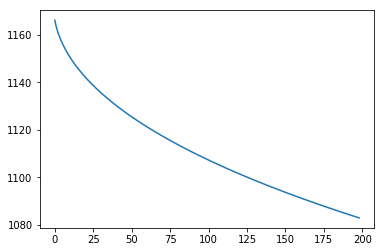

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [5]:
from fipy import *
import numpy as np

## Material properties

Here we define the material properties for the 1080 low carbon stainless steel. The data are taken from the paper "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang.
Data are saved in the text file for reading.

In [6]:
def read_properties():
    # read the text file for different properties
    densityP = np.loadtxt(fname='./density1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    densityMA = np.loadtxt(fname='./density1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    
    conductivityP = np.loadtxt(fname='./conductivity1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    conductivityM = np.loadtxt(fname='./conductivity1080Martensite.txt', comments='#', delimiter=',', dtype='double')
    conductivityA = np.loadtxt(fname='./conductivity1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    
    specificP = np.loadtxt(fname='./specificheat1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    specificMA = np.loadtxt(fname='./specificheat1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    
    return (densityP,densityMA,conductivityP,conductivityM, conductivityA,specificP,specificMA)

Interpolate the experimental data to get interpolating function:

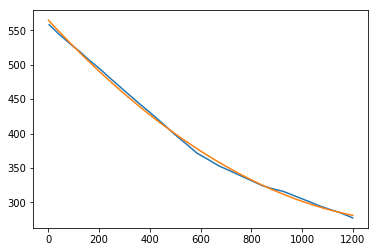

In [7]:
# curve fitting
from scipy.optimize import curve_fit, fsolve, newton
from scipy.interpolate import RectBivariateSpline, CubicSpline
# fit the density function to second order polynomial
def density(x,a,b,c):
     return a*x**2 + b*x + c
def conductivity(x,a,b,c):
    return a*x**2 + b*x + c
def specific_heat(x,a,b,c):
    return a*x**2 + b*x + c
    
#density polynomial
densP = [0.]
condM = [0.]
specificM = [0.]

densityP=read_properties()[0]
densP,pcov = curve_fit(density,densityP[:,0],densityP[:,1])
conductivityM = read_properties()[3]
condM,pcov = curve_fit(conductivity,conductivityM[:,0],conductivityM[:,1])
specificMA = read_properties()[6]
specificM,pcov = curve_fit(specific_heat,specificMA[:,0],specificMA[:,1])
def fP(t_):
    return densP[0]*t_**2+ densP[1]*t_ + densP[2]
def cM(t_):
    return condM[0]*t_**2+ condM[1]*t_ + condM[2]
def sM(t_):
    return specificM[0]*t_**2+ specificM[1]*t_ + specificM[2]

plt.plot(specificMA[:,0],specificMA[:,1])
w = np.linspace(0,1200,100)
plt.plot(w,sM(w))

We now reading the data for cooling coeficient $h_{rc}$. This coefficient contains both contributions from the radiation and convection heat transfer. The data are taken from "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang

/Users/toniivas/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


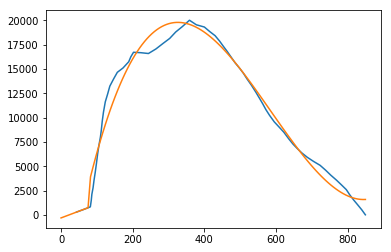

In [8]:
def read_cooling_transfer():
     return np.loadtxt(fname='./cooling1080steel.txt', comments='#', delimiter=',', dtype='double')
def cooling(x,  x0, a,b,c,d,e,f):
    return np.piecewise(x, [x < 82, x >= 82],
                        [lambda x: a*x +b, lambda x: c*x**3+d*x**2+e*x + f])
    
hrcP=[0.]
hrc = read_cooling_transfer()
hrcP,pconv = curve_fit(cooling,hrc[:,0],hrc[:,1])
def hrcf(t_):
      return np.piecewise(t_, [t_ < 82, t_ >= 82],
                        [lambda t_: hrcP[1]*t_ +hrcP[2], lambda t_: hrcP[3]*t_**3+hrcP[4]*t_**2+hrcP[5]*t_ + hrcP[6] ])
        
plt.plot(hrc[:,0],hrc[:,1])
tw = np.linspace(0,850,125)
plt.plot(tw,cooling(tw, *hrcP))

In this section we are reading the data from experimental TTT diagram to evaluate the values of the material parameters $k(T_j)$ and $n(T_j)$. Using the previous equations we can calculate the value of $k(T_j)$:
$$
k(T_j)=-ln(1-F_s)/\theta_j^{n(T_j)}
$$
and
$$
n(T_j)=\frac{ln(\frac{ln(1-F_s)}{ln(1-F_e)})}{ln(\frac{\theta_s}{\theta_e})}
$$
where $\theta$ repesents the equivalent transformation time. $F_s$ and $F_e$ are start fraction of the phase and end fraction of the phase, repectively (usually defined $F_s=0.005$ and $F_e=0.995$).

In this code we first read the experimental data to arrays and then fit x and y data with cubic spline. This gives us information for complete temperature range. The values of $k(T_j)$ and $n(T_j)$ are then calculate using the previous equations.

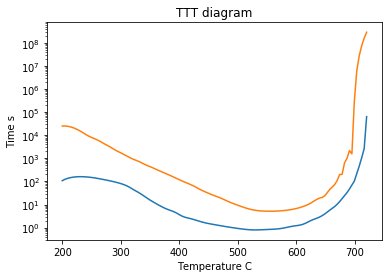

In [9]:
def read_ttt():
    austenite= np.loadtxt(fname='./TTT-diagram1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    pearlite = np.loadtxt(fname='./TTT-diagram1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    return (austenite, pearlite)


(austenite_line, pearlite_line) = read_ttt()

# interpolate using the cubic spline
pearlitespl=CubicSpline(np.flipud(pearlite_line[:,1]),np.flipud(pearlite_line[:,0]))
austenitespl=CubicSpline(np.flipud(austenite_line[:,1]),np.flipud(austenite_line[:,0]))
#plt.semilogy(pearlite_line[:,1], pearlite_line[:,0])
wt = np.linspace(200,720,125)
figp, axp = plt.subplots()
axp.semilogy(wt, austenitespl(wt))
axp.semilogy(wt, pearlitespl(wt))
axp.set_title('TTT diagram')
axp.set_xlabel('Temperature C')
axp.set_ylabel('Time s')
def calcn(Fs, Fe, startspl,endspl, temperature):
    #determine theta for different temperature
    thetas = startspl(temperature)
    thetae = endspl(temperature)
    return np.log(np.log(1-Fs)/np.log(1-Fe))/np.log(thetas/thetae)

n=calcn(0.005,0.995,austenitespl, pearlitespl, wt) #test calculations
def calck(Fs,n,startspl, temperature):
    #determine k
    thetas = startspl(temperature)
    return -np.log(1-Fs)/(thetas**n)
    
k=calck(0.005,n,austenitespl,wt) #test calculations

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [10]:
steps = 100
N = 40
L = 2.5*N/4000
dL = L / N
dt = 0.1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [11]:
fi = CellVariable(mesh=mesh, name='fractions', hasOld=True, value=0.0)
fp = CellVariable(mesh=mesh, name='frac. pearlite', hasOld=True, value=0.0)
xi = CellVariable(mesh=mesh, name='volume fract.',hasOld=True, value=0.)
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
tincubation = CellVariable(mesh = mesh, name='incubation', value=0., hasOld=True)
n = CellVariable(mesh = mesh, name='jmak exponent', value=0.)
k = CellVariable(mesh = mesh, name='jmak coeff', value=0.)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [12]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
temperature.constrain(t_inf, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)
fluxBottom = hrcf(temperature.faceValue.value)*(temperature.faceValue-t_inf) #changed the default value to exp. measured

Calculation of the transformation time (incubation time) before start of diffusive reaction:

In [13]:
def transformation_time(fp,k,n):
    return (np.log(1./(1.-fp)) / k)**(1./n)
def volume_fraction(time,k,n):
    fp.setValue(1-np.exp(-k*time**n), where= tincubation > 1.)

For now we are assuming that complete austinite is transforming directly in martensite phase. We are using here Koistinen-Marburger law:
$$
F_m = (1-exp(-\alpha(T_{ms}-T))(1-\sum_{i=1}F_i)
$$
where $F_i$ represent the fraction of the different fractions of the perlite, banite and austinite phase. The sumation is not done for martensite phase. 
Alpha is constant taken from the paper 

In [14]:
alpha = 1.10E-2; 
Tm= 230+273;    # martensitic start temperature for 1080 steel
def koistinen_marburger(temperature):
    #fi.setValue(1.0-np.exp(-alpha*(Tm-temperature)), where=Tm-temperature > 0)
    fi.setValue( (1.0-(np.exp(-alpha*Tm)*(1+alpha*temperature+0.5*(alpha*temperature)**2+1./6*(alpha*temperature)**3)))*(1.0-fp), where=Tm-temperature > 0)

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the austinite phase transformed in martensite and enthalpy of the formation.

In [15]:
deltaHm = 640e+6  # martensite enthalpy
deltaHp = 1.56e+9 + 1.5e+6*temperature # pearlite enthalpy
#deltaHm=0.
#def phaseSourceT():
#    return deltaHm*(fi-fi.old)/dt
def phaseSourceT():
    return TransientTerm(var=fi,coeff=deltaHm)+TransientTerm(var=fp,coeff=deltaHp)

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.
Here we added also same flux from the right side of the cylinder, assuming that the cooling liquid is also hitting the right side of cylinder.

In [16]:
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature)== DiffusionTerm(coeff=cM(temperature),var=temperature)+ \
(mesh.facesBottom*fluxBottom).divergence+phaseSourceT()

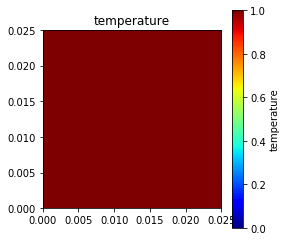

In [17]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

In [18]:
#import fipy.solvers.pyAMG as solvers
import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 3000 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    temperature.updateOld()
    fi.updateOld()
    fp.updateOld()
    
    # calculate incubation time
    n = calcn(0.005,0.995,austenitespl, pearlitespl, temperature)
    k = calck(0.005,n,austenitespl,temperature)
    tt = transformation_time(fp,k,n)
    tincubation.setValue(tincubation.value + dt/austenitespl(temperature))
    print tincubation
    # calculate volume fraction of the pearlite phase
    # the reaction start when incubation time reaches 1.0
    volume_fraction(tt+dt,k,n) 
        
    # update martensite fraction using koistinen-marburger eq.
    koistinen_marburger(temperature) 
    # update complete volume fraction
    xi = fp + fi
    print max(xi)
    while(terr > eps):
        print "Residual %f" % terr
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureOH"+str(i)+".eps")  
        np.savetxt(path+"temperatureOH"+str(i),temperature)
        np.savetxt(path+"martensiteOH"+str(i),fi)
        np.savetxt(path+"pearliteOH"+str(i),fp)
        Tvstime.append(temperature.value[0])
        print "step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature)
        

/Users/toniivas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


[-2.00177358e-14 -2.00177358e-14 -2.00177358e-14 ... -2.00177358e-14
 -2.00177358e-14 -2.00177358e-14]
0.0
Residual 100000000000.000000
Residual 7927.336533
Residual 1476.520109
Residual 634.942112
Residual 402.450540
Residual 232.335170
Residual 143.957926
Residual 85.974321
Residual 52.744506
Residual 31.921570
Residual 19.524761
Residual 11.885322
Residual 7.266457
Residual 4.435851
Residual 2.713079
Residual 1.658832
Residual 1.015199
Residual 0.621340
Residual 0.380487
Residual 0.233040
Residual 0.142782
Residual 0.087500
Residual 0.053636
Residual 0.032884
Residual 0.020165
Residual 0.012368
Residual 0.007587
Residual 0.004655
Residual 0.002856
Residual 0.001753
Residual 0.001076
Residual 0.000661
Residual 0.000406
Residual 0.000249
Residual 0.000153
Residual 0.000094
Residual 0.000058
Residual 0.000035
Residual 0.000022
Residual 0.000013
step:  0 Min. temperature 504.87872083919103 Max. temperature 1172.9999999996685
[-8.59109711e-13 -8.59109711e-13 -8.59109711e-13 ... -8.932896

Residual 0.000083
Residual 0.000045
Residual 0.000024
Residual 0.000013
step:  10 Min. temperature 308.45646266691836 Max. temperature 1172.9995299567577
[0.9272583  0.92725827 0.92725822 ... 0.5951453  0.81672508 0.28918057]
0.9341256186121129
Residual 100000000000.000000
Residual 217.227829
Residual 41.340599
Residual 22.943266
Residual 12.736967
Residual 7.063297
Residual 3.924793
Residual 2.180337
Residual 1.212140
Residual 0.673909
Residual 0.374797
Residual 0.208468
Residual 0.115975
Residual 0.064527
Residual 0.035906
Residual 0.019982
Residual 0.011121
Residual 0.006190
Residual 0.003446
Residual 0.001918
Residual 0.001068
Residual 0.000595
Residual 0.000331
Residual 0.000184
Residual 0.000103
Residual 0.000057
Residual 0.000032
Residual 0.000018
step:  11 Min. temperature 307.4084696979924 Max. temperature 1172.9990435757925
[1.02794848 1.02794845 1.02794838 ... 0.71778673 0.86499238 0.2935016 ]
0.9345870983085349
Residual 100000000000.000000
Residual 203.344846
Residual 30.39

Residual 1.927526
Residual 1.053741
Residual 0.576286
Residual 0.315314
Residual 0.172563
Residual 0.094461
Residual 0.051716
Residual 0.028317
Residual 0.015507
Residual 0.008493
Residual 0.004652
Residual 0.002548
Residual 0.001396
Residual 0.000765
Residual 0.000419
Residual 0.000230
Residual 0.000126
Residual 0.000069
Residual 0.000038
Residual 0.000021
Residual 0.000011
step:  23 Min. temperature 301.23717417120605 Max. temperature 1172.773874221592
[1.81440971 1.81439493 1.81436372 ... 1.77939383 1.22818668 0.33178328]
0.9372581070599307
Residual 100000000000.000000
Residual 241.877956
Residual 9.086034
Residual 4.844594
Residual 2.620219
Residual 1.421603
Residual 0.773040
Residual 0.420890
Residual 0.229383
Residual 0.125092
Residual 0.068252
Residual 0.037253
Residual 0.020340
Residual 0.011108
Residual 0.006067
Residual 0.003315
Residual 0.001811
Residual 0.000990
Residual 0.000541
Residual 0.000296
Residual 0.000162
Residual 0.000088
Residual 0.000048
Residual 0.000026
Resid

Residual 0.000618
Residual 0.000330
Residual 0.000177
Residual 0.000095
Residual 0.000051
Residual 0.000027
Residual 0.000015
step:  36 Min. temperature 299.2126773331705 Max. temperature 1169.0284406845476
[2.30503171 2.30487204 2.30454341 ... 2.4094291  1.41146341 0.36131755]
0.9381171506397258
Residual 100000000000.000000
Residual 199.477455
Residual 4.119896
Residual 2.146779
Residual 1.154174
Residual 0.621562
Residual 0.335147
Residual 0.180851
Residual 0.097650
Residual 0.052748
Residual 0.028503
Residual 0.015406
Residual 0.008329
Residual 0.004504
Residual 0.002436
Residual 0.001317
Residual 0.000713
Residual 0.000386
Residual 0.000209
Residual 0.000113
Residual 0.000061
Residual 0.000033
Residual 0.000018
step:  37 Min. temperature 299.11839547620576 Max. temperature 1168.3571985597096
[2.33268618 2.33250015 2.33211804 ... 2.44846019 1.42244221 0.36336652]
0.9381569513279866
Residual 100000000000.000000
Residual 162.829692
Residual 5.175717
Residual 2.625019
Residual 1.349947

Residual 0.009589
Residual 0.005153
Residual 0.002769
Residual 0.001488
Residual 0.000800
Residual 0.000430
Residual 0.000231
Residual 0.000124
Residual 0.000067
Residual 0.000036
Residual 0.000019
Residual 0.000010
step:  50 Min. temperature 298.24944214634763 Max. temperature 1151.0456071186857
[2.65622091 2.65563252 2.65443153 ... 2.81517112 1.53421935 0.38789415]
0.9385229178254546
Residual 100000000000.000000
Residual 106.842375
Residual 1.943891
Residual 0.985996
Residual 0.522485
Residual 0.277737
Residual 0.147903
Residual 0.078854
Residual 0.042076
Residual 0.022467
Residual 0.012003
Residual 0.006416
Residual 0.003431
Residual 0.001836
Residual 0.000982
Residual 0.000526
Residual 0.000282
Residual 0.000151
Residual 0.000081
Residual 0.000043
Residual 0.000023
Residual 0.000012
step:  51 Min. temperature 298.2014122934258 Max. temperature 1148.9411593833702
[2.6754031  2.67478758 2.67353063 ... 2.83500546 1.54093995 0.38963739]
0.9385431008402924
Residual 100000000000.000000
R

Residual 0.000058
Residual 0.000031
Residual 0.000017
step:  64 Min. temperature 297.7390056515271 Max. temperature 1110.5588778418173
[2.90161909 2.90067034 2.89874009 ... 3.0812174  1.6237937  0.4119376 ]
0.9387371709020217
Residual 100000000000.000000
Residual 65.324780
Residual 1.294833
Residual 0.577483
Residual 0.306722
Residual 0.163136
Residual 0.086830
Residual 0.046234
Residual 0.024625
Residual 0.013118
Residual 0.006990
Residual 0.003725
Residual 0.001985
Residual 0.001058
Residual 0.000564
Residual 0.000301
Residual 0.000160
Residual 0.000085
Residual 0.000046
Residual 0.000024
Residual 0.000013
step:  65 Min. temperature 297.71310331276493 Max. temperature 1106.7883099623907
[2.91795225 2.91698469 2.91501806 ... 3.09804012 1.62944023 0.41359776]
0.9387480290607851
Residual 100000000000.000000
Residual 71.278713
Residual 1.235852
Residual 0.535483
Residual 0.285693
Residual 0.152293
Residual 0.081210
Residual 0.043312
Residual 0.023103
Residual 0.012325
Residual 0.006576
R

Residual 0.000011
step:  79 Min. temperature 297.45544618218617 Max. temperature 1044.2281717664657
[3.14354955 3.14219889 3.13945896 ... 3.32567232 1.70544421 0.43659836]
1.0641766984249974
Residual 100000000000.000000
Residual 19.736731
Residual 0.667737
Residual 0.144769
Residual 0.067920
Residual 0.035109
Residual 0.018255
Residual 0.009504
Residual 0.004953
Residual 0.002584
Residual 0.001350
Residual 0.000706
Residual 0.000369
Residual 0.000193
Residual 0.000101
Residual 0.000053
Residual 0.000028
Residual 0.000015
step:  80 Min. temperature 297.4451418641389 Max. temperature 1039.2103388915648
[3.1594163  3.15802853 3.15521315 ... 3.34225511 1.71096673 0.43824768]
1.089499959683879
Residual 100000000000.000000
Residual 19.620371
Residual 0.773300
Residual 0.133810
Residual 0.056502
Residual 0.028412
Residual 0.014481
Residual 0.007386
Residual 0.003771
Residual 0.001927
Residual 0.000985
Residual 0.000504
Residual 0.000258
Residual 0.000132
Residual 0.000068
Residual 0.000035
Re

Residual 0.000791
Residual 0.000413
Residual 0.000216
Residual 0.000113
Residual 0.000059
Residual 0.000031
Residual 0.000016
step:  95 Min. temperature 297.4692258677226 Max. temperature 960.1716276391994
[3.37794488 3.37611857 3.37243496 ... 3.59253242 1.79465242 0.46306149]
1.4622150186002858
Residual 100000000000.000000
Residual 16.475778
Residual 1.965757
Residual 0.451102
Residual 0.152157
Residual 0.069704
Residual 0.035617
Residual 0.018437
Residual 0.009587
Residual 0.004984
Residual 0.002592
Residual 0.001348
Residual 0.000701
Residual 0.000365
Residual 0.000190
Residual 0.000099
Residual 0.000051
Residual 0.000027
Residual 0.000014
step:  96 Min. temperature 297.4806700777748 Max. temperature 954.8443263072757
[3.39064416 3.38880953 3.38510952 ... 3.60795898 1.79983779 0.4646871 ]
1.482663096971175
Residual 100000000000.000000
Residual 19.609653
Residual 2.339378
Residual 0.519187
Residual 0.161303
Residual 0.069389
Residual 0.035018
Residual 0.018005
Residual 0.009337
Resid

Residual 0.001112
Residual 0.000591
Residual 0.000314
Residual 0.000167
Residual 0.000089
Residual 0.000047
Residual 0.000025
Residual 0.000013
step:  110 Min. temperature 297.45648040612 Max. temperature 883.4517046249506
[3.54550646 3.54357221 3.53967261 ... 3.78979203 1.862587   0.48667975]
0.9999325787794376
Residual 100000000000.000000
Residual 16.758998
Residual 3.068443
Residual 0.903788
Residual 0.366356
Residual 0.176063
Residual 0.092208
Residual 0.048635
Residual 0.025845
Residual 0.013718
Residual 0.007289
Residual 0.003871
Residual 0.002056
Residual 0.001092
Residual 0.000580
Residual 0.000308
Residual 0.000164
Residual 0.000087
Residual 0.000046
Residual 0.000025
Residual 0.000013
step:  111 Min. temperature 297.4382011160776 Max. temperature 878.6871643922728
[3.55514481 3.55320077 3.54928148 ... 3.80054675 1.86646125 0.48820102]
0.9999599059627854
Residual 100000000000.000000
Residual 16.570404
Residual 3.033812
Residual 0.894838
Residual 0.361595
Residual 0.173299
Resi

Residual 2.531357
Residual 0.748885
Residual 0.288464
Residual 0.132688
Residual 0.068358
Residual 0.035777
Residual 0.018960
Residual 0.010036
Residual 0.005322
Residual 0.002820
Residual 0.001495
Residual 0.000793
Residual 0.000420
Residual 0.000223
Residual 0.000118
Residual 0.000063
Residual 0.000033
Residual 0.000018
step:  125 Min. temperature 297.17671711595693 Max. temperature 817.8495932989634
[3.67458806 3.67248562 3.66824861 ... 3.92999258 1.91525681 0.50900603]
0.9999990846872265
Residual 100000000000.000000
Residual 13.463448
Residual 2.496614
Residual 0.738092
Residual 0.283060
Residual 0.129700
Residual 0.066718
Residual 0.034895
Residual 0.018490
Residual 0.009786
Residual 0.005188
Residual 0.002749
Residual 0.001457
Residual 0.000772
Residual 0.000409
Residual 0.000217
Residual 0.000115
Residual 0.000061
Residual 0.000032
Residual 0.000017
step:  126 Min. temperature 297.16002891603637 Max. temperature 813.9182850221038
[3.6821905  3.68007567 3.67581385 ... 3.93802424 

Residual 0.047649
Residual 0.024679
Residual 0.013039
Residual 0.006884
Residual 0.003645
Residual 0.001929
Residual 0.001021
Residual 0.000540
Residual 0.000286
Residual 0.000151
Residual 0.000080
Residual 0.000042
Residual 0.000022
Residual 0.000012
step:  140 Min. temperature 296.9650011412641 Max. temperature 764.0495522398332
[3.77868819 3.77639512 3.77177623 ... 4.03872409 1.96002431 0.53054607]
0.9999999674344399
Residual 100000000000.000000
Residual 10.283182
Residual 1.981360
Residual 0.584446
Residual 0.213085
Residual 0.092666
Residual 0.046543
Residual 0.024087
Residual 0.012723
Residual 0.006717
Residual 0.003556
Residual 0.001882
Residual 0.000996
Residual 0.000527
Residual 0.000279
Residual 0.000148
Residual 0.000078
Residual 0.000041
Residual 0.000022
Residual 0.000012
step:  141 Min. temperature 296.95355148008207 Max. temperature 760.8305744781595
[3.78496812 3.78266216 3.77801745 ... 4.04520184 1.96282404 0.53196153]
0.9999999738420335
Residual 100000000000.000000
Re

step:  155 Min. temperature 296.8202170863926 Max. temperature 720.1783836271869
[3.86587862 3.8633936  3.85838999 ... 4.12818883 2.00025529 0.55156722]
0.9999999985943311
Residual 100000000000.000000
Residual 8.500189
Residual 1.819863
Residual 0.528969
Residual 0.180099
Residual 0.072245
Residual 0.034678
Residual 0.017594
Residual 0.009242
Residual 0.004863
Residual 0.002572
Residual 0.001359
Residual 0.000718
Residual 0.000380
Residual 0.000201
Residual 0.000106
Residual 0.000056
Residual 0.000030
Residual 0.000016
step:  156 Min. temperature 296.812329789231 Max. temperature 717.5860052863413
[3.87119633 3.86869886 3.86367032 ... 4.13361845 2.0028156  0.55295384]
0.9999999989104693
Residual 100000000000.000000
Residual 8.432879
Residual 1.820079
Residual 0.528759
Residual 0.179329
Residual 0.071538
Residual 0.034212
Residual 0.017328
Residual 0.009098
Residual 0.004785
Residual 0.002530
Residual 0.001337
Residual 0.000707
Residual 0.000374
Residual 0.000198
Residual 0.000104
Resid

Residual 0.000314
Residual 0.000166
Residual 0.000088
Residual 0.000046
Residual 0.000024
Residual 0.000013
step:  171 Min. temperature 296.7106976687931 Max. temperature 683.7273138401154
[3.94455381 3.9418786  3.93649449 ... 4.20823597 2.03961841 0.57355572]
0.9999999999822347
Residual 100000000000.000000
Residual 7.471412
Residual 1.792424
Residual 0.522934
Residual 0.171903
Residual 0.064843
Residual 0.029621
Residual 0.014659
Residual 0.007635
Residual 0.004000
Residual 0.002112
Residual 0.001114
Residual 0.000588
Residual 0.000311
Residual 0.000164
Residual 0.000087
Residual 0.000046
Residual 0.000024
Residual 0.000013
step:  172 Min. temperature 296.70474330690206 Max. temperature 681.806302779978
[3.94904981 3.94636342 3.94095694 ... 4.21279301 2.04197023 0.57491666]
0.9999999999877865
Residual 100000000000.000000
Residual 7.418090
Residual 1.790633
Residual 0.522632
Residual 0.171549
Residual 0.064513
Residual 0.029384
Residual 0.014518
Residual 0.007558
Residual 0.003958
Resi

Residual 0.012770
Residual 0.006584
Residual 0.003433
Residual 0.001809
Residual 0.000953
Residual 0.000503
Residual 0.000265
Residual 0.000140
Residual 0.000074
Residual 0.000039
Residual 0.000021
Residual 0.000011
step:  187 Min. temperature 296.6237352678721 Max. temperature 657.910034880546
[4.01142664 4.0085833  4.0028634  ... 4.27583403 2.07583118 0.59515818]
0.9999999999999353
Residual 100000000000.000000
Residual 6.822095
Residual 1.764086
Residual 0.518598
Residual 0.167237
Residual 0.060388
Residual 0.026302
Residual 0.012664
Residual 0.006525
Residual 0.003400
Residual 0.001792
Residual 0.000944
Residual 0.000498
Residual 0.000263
Residual 0.000139
Residual 0.000073
Residual 0.000039
Residual 0.000020
Residual 0.000011
step:  188 Min. temperature 296.61881864909935 Max. temperature 656.6349851675985
[4.0152772  4.01242413 4.00668484 ... 4.27971392 2.07799754 0.59649663]
0.9999999999999537
Residual 100000000000.000000
Residual 6.783330
Residual 1.761008
Residual 0.518030
Resi

Residual 0.024022
Residual 0.011285
Residual 0.005750
Residual 0.002981
Residual 0.001568
Residual 0.000824
Residual 0.000435
Residual 0.000229
Residual 0.000121
Residual 0.000064
Residual 0.000034
Residual 0.000018
step:  203 Min. temperature 296.5508108538031 Max. temperature 641.9478609652951
[4.06913962 4.06615223 4.06014529 ... 4.33387148 2.10923314 0.61642225]
0.9999999999999999
Residual 100000000000.000000
Residual 6.341101
Residual 1.711024
Residual 0.507582
Residual 0.162319
Residual 0.057017
Residual 0.023886
Residual 0.011203
Residual 0.005704
Residual 0.002956
Residual 0.001555
Residual 0.000817
Residual 0.000431
Residual 0.000227
Residual 0.000120
Residual 0.000063
Residual 0.000033
Residual 0.000018
step:  204 Min. temperature 296.5466186441301 Max. temperature 641.2528675374999
[4.07249388 4.0694983  4.06347506 ... 4.33723959 2.11123625 0.61774105]
0.9999999999999999
Residual 100000000000.000000
Residual 6.319981
Residual 1.707622
Residual 0.506811
Residual 0.162008
Resi

Residual 6.010661
Residual 1.660952
Residual 0.496412
Residual 0.157845
Residual 0.054272
Residual 0.021943
Residual 0.010017
Residual 0.005030
Residual 0.002591
Residual 0.001359
Residual 0.000714
Residual 0.000376
Residual 0.000198
Residual 0.000104
Residual 0.000055
Residual 0.000029
Residual 0.000015
step:  220 Min. temperature 296.4844997025995 Max. temperature 635.3921687301548
[4.12278677 4.11967274 4.11341393 ... 4.38775318 2.1420968  0.63869367]
1.0
Residual 100000000000.000000


/Users/toniivas/anaconda2/lib/python2.7/site-packages/fipy/variables/variable.py:1170: RuntimeWarning: divide by zero encountered in divide
  return self._BinaryOperatorVariable(lambda a,b: b/a, other)


Residual 5.994624
Residual 1.658227
Residual 0.495791
Residual 0.157597
Residual 0.054122
Residual 0.021836
Residual 0.009950
Residual 0.004992
Residual 0.002571
Residual 0.001348
Residual 0.000708
Residual 0.000373
Residual 0.000196
Residual 0.000103
Residual 0.000054
Residual 0.000029
Residual 0.000015
step:  221 Min. temperature 296.4809057264536 Max. temperature 635.7393946395249
[4.12573885 4.12261817 4.11634615 ... 4.39072103 2.14395658 0.63999441]
1.0
Residual 100000000000.000000
Residual 5.977110
Residual 1.655481
Residual 0.495174
Residual 0.157353
Residual 0.053974
Residual 0.021730
Residual 0.009884
Residual 0.004955
Residual 0.002550
Residual 0.001337
Residual 0.000702
Residual 0.000370
Residual 0.000195
Residual 0.000103
Residual 0.000054
Residual 0.000028
Residual 0.000015
step:  222 Min. temperature 296.4773433232658 Max. temperature 636.1012391001062
[4.12867056 4.12554332 4.11925826 ... 4.39366891 2.14580884 0.64129415]
1.0
Residual 100000000000.000000
Residual 5.95775

Residual 0.152357
Residual 0.051490
Residual 0.020127
Residual 0.008920
Residual 0.004406
Residual 0.002252
Residual 0.001177
Residual 0.000617
Residual 0.000325
Residual 0.000171
Residual 0.000090
Residual 0.000047
Residual 0.000025
Residual 0.000013
step:  238 Min. temperature 296.42435037925816 Max. temperature 643.1047462781116
[4.17304298 4.16982112 4.16334797 ... 4.43837018 2.17449555 0.66196166]
1.0
Residual 100000000000.000000
Residual 5.630766
Residual 1.591053
Residual 0.479580
Residual 0.151986
Residual 0.051327
Residual 0.020030
Residual 0.008863
Residual 0.004374
Residual 0.002235
Residual 0.001168
Residual 0.000612
Residual 0.000322
Residual 0.000169
Residual 0.000089
Residual 0.000047
Residual 0.000025
Residual 0.000013
step:  239 Min. temperature 296.4212724412038 Max. temperature 643.6284431368479
[4.17567034 4.17244309 4.16595922 ... 4.44102329 2.17623346 0.66324568]
1.0
Residual 100000000000.000000
Residual 5.606891
Residual 1.586252
Residual 0.478367
Residual 0.1515

Residual 0.460302
Residual 0.145747
Residual 0.048720
Residual 0.018566
Residual 0.008023
Residual 0.003900
Residual 0.001979
Residual 0.001031
Residual 0.000539
Residual 0.000284
Residual 0.000149
Residual 0.000078
Residual 0.000041
Residual 0.000022
Residual 0.000011
step:  255 Min. temperature 296.3753623169225 Max. temperature 652.682772258204
[4.21563772 4.21232982 4.20568533 ... 4.48150301 2.20327759 0.68367618]
1.0
Residual 100000000000.000000
Residual 5.238619
Residual 1.513231
Residual 0.459189
Residual 0.145382
Residual 0.048569
Residual 0.018482
Residual 0.007975
Residual 0.003873
Residual 0.001964
Residual 0.001023
Residual 0.000535
Residual 0.000281
Residual 0.000148
Residual 0.000078
Residual 0.000041
Residual 0.000022
Residual 0.000011
step:  256 Min. temperature 296.37268899693004 Max. temperature 653.1765281238137
[4.21801281 4.21470016 4.2080462  ... 4.48391688 2.2049239  0.68494626]
1.0
Residual 100000000000.000000
Residual 5.219680
Residual 1.509389
Residual 0.45815

Residual 0.017276
Residual 0.007270
Residual 0.003471
Residual 0.001745
Residual 0.000906
Residual 0.000473
Residual 0.000248
Residual 0.000130
Residual 0.000069
Residual 0.000036
Residual 0.000019
step:  272 Min. temperature 296.3327302615647 Max. temperature 659.2871166816751
[4.25419787 4.25081303 4.24401522 ... 4.5208402  2.23065664 0.70516675]
1.0
Residual 100000000000.000000
Residual 4.950751
Residual 1.452818
Residual 0.443160
Residual 0.140118
Residual 0.046349
Residual 0.017212
Residual 0.007231
Residual 0.003448
Residual 0.001733
Residual 0.000899
Residual 0.000469
Residual 0.000247
Residual 0.000129
Residual 0.000068
Residual 0.000036
Residual 0.000019
step:  273 Min. temperature 296.3303983979766 Max. temperature 659.5230739856951
[4.25635007 4.25296095 4.24615465 ... 4.52304604 2.23222966 0.70642447]
1.0
Residual 100000000000.000000
Residual 4.936532
Residual 1.449944
Residual 0.442420
Residual 0.139875
Residual 0.046243
Residual 0.017148
Residual 0.007193
Residual 0.00342

Residual 0.000061
Residual 0.000032
Residual 0.000017
step:  289 Min. temperature 296.2954262101734 Max. temperature 661.47310046124
[4.28917188 4.28571996 4.27878879 ... 4.55682457 2.25690128 0.72645795]
1.0
Residual 100000000000.000000
Residual 4.765868
Residual 1.414791
Residual 0.433686
Residual 0.137000
Residual 0.044933
Residual 0.016306
Residual 0.006662
Residual 0.003111
Residual 0.001546
Residual 0.000799
Residual 0.000416
Residual 0.000218
Residual 0.000114
Residual 0.000060
Residual 0.000032
Residual 0.000017
step:  290 Min. temperature 296.29337580992575 Max. temperature 661.5056766664727
[4.2911281  4.28767263 4.28073444 ... 4.55884542 2.25841417 0.7277046 ]
1.0
Residual 100000000000.000000
Residual 4.759348
Residual 1.413544
Residual 0.433419
Residual 0.136909
Residual 0.044883
Residual 0.016266
Residual 0.006635
Residual 0.003093
Residual 0.001537
Residual 0.000793
Residual 0.000413
Residual 0.000217
Residual 0.000114
Residual 0.000060
Residual 0.000031
Residual 0.000016

Residual 1.414338
Residual 0.435476
Residual 0.137456
Residual 0.044736
Residual 0.015871
Residual 0.006292
Residual 0.002864
Residual 0.001404
Residual 0.000721
Residual 0.000374
Residual 0.000196
Residual 0.000103
Residual 0.000054
Residual 0.000028
Residual 0.000015
step:  307 Min. temperature 296.26060065113796 Max. temperature 660.9320624372826
[4.32287602 4.31936785 4.31232508 ... 4.59173728 2.28366498 0.74880575]
1.0
Residual 100000000000.000000
Residual 4.716061
Residual 1.414794
Residual 0.435755
Residual 0.137546
Residual 0.044749
Residual 0.015857
Residual 0.006275
Residual 0.002852
Residual 0.001397
Residual 0.000717
Residual 0.000372
Residual 0.000195
Residual 0.000102
Residual 0.000054
Residual 0.000028
Residual 0.000015
step:  308 Min. temperature 296.2587838095025 Max. temperature 660.8392126449878
[4.32466157 4.32115073 4.31410267 ... 4.59359145 2.28512431 0.75004174]
1.0
Residual 100000000000.000000
Residual 4.713217
Residual 1.415114
Residual 0.436000
Residual 0.1376

Residual 0.000094
Residual 0.000049
Residual 0.000026
Residual 0.000014
step:  324 Min. temperature 296.23109938551414 Max. temperature 658.6024521569909
[4.3521648  4.34861732 4.3414966  ... 4.62217859 2.30811464 0.76974196]
1.0
Residual 100000000000.000000
Residual 4.639965
Residual 1.407384
Residual 0.436006
Residual 0.137844
Residual 0.044682
Residual 0.015589
Residual 0.006023
Residual 0.002674
Residual 0.001292
Residual 0.000658
Residual 0.000341
Residual 0.000178
Residual 0.000093
Residual 0.000049
Residual 0.000026
Residual 0.000013
step:  325 Min. temperature 296.22944684323824 Max. temperature 658.4215667113228
[4.35382255 4.35027314 4.34314857 ... 4.62390214 2.30953006 0.77096859]
1.0
Residual 100000000000.000000
Residual 4.632127
Residual 1.405898
Residual 0.435700
Residual 0.137768
Residual 0.044653
Residual 0.015569
Residual 0.006008
Residual 0.002664
Residual 0.001286
Residual 0.000655
Residual 0.000339
Residual 0.000177
Residual 0.000093
Residual 0.000049
Residual 0.000

Residual 0.427572
Residual 0.135539
Residual 0.043898
Residual 0.015176
Residual 0.005767
Residual 0.002514
Residual 0.001200
Residual 0.000608
Residual 0.000314
Residual 0.000164
Residual 0.000086
Residual 0.000045
Residual 0.000024
Residual 0.000012
step:  342 Min. temperature 296.2025208719436 Max. temperature 654.6512800099458
[4.38106908 4.37749191 4.37031225 ... 4.65220744 2.3332352  0.79174116]
1.0
Residual 100000000000.000000
Residual 4.475134
Residual 1.370560
Residual 0.427109
Residual 0.135410
Residual 0.043854
Residual 0.015152
Residual 0.005753
Residual 0.002505
Residual 0.001195
Residual 0.000606
Residual 0.000313
Residual 0.000163
Residual 0.000085
Residual 0.000045
Residual 0.000023
Residual 0.000012
step:  343 Min. temperature 296.2010007679776 Max. temperature 654.3736538396764
[4.38262156 4.37904302 4.37186065 ... 4.65381831 2.33460952 0.79295847]
1.0
Residual 100000000000.000000
Residual 4.466468
Residual 1.368668
Residual 0.426648
Residual 0.135282
Residual 0.04381

Residual 0.000289
Residual 0.000151
Residual 0.000079
Residual 0.000041
Residual 0.000022
Residual 0.000011
step:  359 Min. temperature 296.1775725024099 Max. temperature 647.3991789557427
[4.4068126  4.40321532 4.39599572 ... 4.67887953 2.35631868 0.81236873]
1.0
Residual 100000000000.000000
Residual 4.377389
Residual 1.351856
Residual 0.423315
Residual 0.134477
Residual 0.043493
Residual 0.014878
Residual 0.005546
Residual 0.002363
Residual 0.001111
Residual 0.000559
Residual 0.000287
Residual 0.000150
Residual 0.000078
Residual 0.000041
Residual 0.000022
Residual 0.000011
step:  360 Min. temperature 296.1761629484116 Max. temperature 646.6485591528542
[4.40828713 4.40468885 4.39746727 ... 4.68040436 2.35765875 0.81357781]
1.0
Residual 100000000000.000000
Residual 4.374667
Residual 1.351738
Residual 0.423403
Residual 0.134521
Residual 0.043503
Residual 0.014872
Residual 0.005537
Residual 0.002356
Residual 0.001106
Residual 0.000556
Residual 0.000286
Residual 0.000149
Residual 0.00007

Residual 0.137030
Residual 0.044262
Residual 0.014974
Residual 0.005460
Residual 0.002262
Residual 0.001041
Residual 0.000518
Residual 0.000265
Residual 0.000138
Residual 0.000072
Residual 0.000038
Residual 0.000020
Residual 0.000010
step:  377 Min. temperature 296.1531434286887 Max. temperature 624.5017984393303
[4.43277083 4.42915813 4.42190787 ... 4.70566862 2.38016106 0.83406237]
1.0
Residual 100000000000.000000
Residual 4.384881
Residual 1.368602
Residual 0.431168
Residual 0.137332
Residual 0.044357
Residual 0.014996
Residual 0.005461
Residual 0.002257
Residual 0.001038
Residual 0.000515
Residual 0.000264
Residual 0.000137
Residual 0.000072
Residual 0.000038
Residual 0.000020
Residual 0.000010
step:  378 Min. temperature 296.15184268746566 Max. temperature 622.1313289556149
[4.43417923 4.43056581 4.42331413 ... 4.70711852 2.38146899 0.83526334]
1.0
Residual 100000000000.000000
Residual 4.389652
Residual 1.371035
Residual 0.432107
Residual 0.137658
Residual 0.044460
Residual 0.0150

Residual 0.136761
Residual 0.044233
Residual 0.014878
Residual 0.005348
Residual 0.002167
Residual 0.000979
Residual 0.000482
Residual 0.000245
Residual 0.000127
Residual 0.000066
Residual 0.000035
Residual 0.000018
step:  395 Min. temperature 296.1305441529845 Max. temperature 494.69381939152584
[4.45764701 4.45402326 4.44675103 ... 4.73121546 2.403454   0.85561416]
1.0
Residual 100000000000.000000
Residual 4.231256
Residual 1.336568
Residual 0.424175
Residual 0.135706
Residual 0.043905
Residual 0.014776
Residual 0.005314
Residual 0.002155
Residual 0.000975
Residual 0.000480
Residual 0.000244
Residual 0.000127
Residual 0.000066
Residual 0.000035
Residual 0.000018
step:  396 Min. temperature 296.12933552279105 Max. temperature 482.44276507769905
[4.45900128 4.45537703 4.44810378 ... 4.73260219 2.40473301 0.85680748]
1.0
Residual 100000000000.000000
Residual 4.181811
Residual 1.321164
Residual 0.419283
Residual 0.134158
Residual 0.043418
Residual 0.014624
Residual 0.005267
Residual 0.00

Residual 0.004502
Residual 0.001905
Residual 0.000889
Residual 0.000445
Residual 0.000228
Residual 0.000119
Residual 0.000062
Residual 0.000032
Residual 0.000017
step:  413 Min. temperature 296.10941701149477 Max. temperature 408.39197733584206
[4.4816257  4.47799418 4.47070647 ... 4.75569968 2.42624715 0.87703094]
1.0
Residual 100000000000.000000
Residual 3.329851
Residual 1.049067
Residual 0.332699
Residual 0.106742
Residual 0.034790
Residual 0.011958
Residual 0.004458
Residual 0.001891
Residual 0.000885
Residual 0.000443
Residual 0.000227
Residual 0.000118
Residual 0.000062
Residual 0.000032
Residual 0.000017
step:  414 Min. temperature 296.10827881091234 Max. temperature 405.97754547597106
[4.48293445 4.47930258 4.47201417 ... 4.75703166 2.42749962 0.87821692]
1.0
Residual 100000000000.000000
Residual 3.283294
Residual 1.034193
Residual 0.327965
Residual 0.105243
Residual 0.034319
Residual 0.011813
Residual 0.004414
Residual 0.001878
Residual 0.000880
Residual 0.000441
Residual 0.0

Residual 0.003737
Residual 0.001649
Residual 0.000791
Residual 0.000401
Residual 0.000207
Residual 0.000108
Residual 0.000056
Residual 0.000030
Residual 0.000015
step:  431 Min. temperature 296.08951232787973 Max. temperature 374.7722373749251
[4.50485073 4.50121389 4.49391556 ... 4.77927219 2.44858748 0.89832019]
1.0
Residual 100000000000.000000
Residual 2.563125
Residual 0.804861
Residual 0.255107
Residual 0.082170
Residual 0.027048
Residual 0.009537
Residual 0.003696
Residual 0.001633
Residual 0.000784
Residual 0.000398
Residual 0.000205
Residual 0.000107
Residual 0.000056
Residual 0.000029
Residual 0.000015
step:  432 Min. temperature 296.088449125474 Max. temperature 373.3455509528298
[4.50612184 4.50248476 4.49518594 ... 4.78055863 2.4498167  0.89949948]
1.0
Residual 100000000000.000000
Residual 2.524972
Residual 0.792762
Residual 0.251269
Residual 0.080952
Residual 0.026661
Residual 0.009413
Residual 0.003654
Residual 0.001618
Residual 0.000778
Residual 0.000395
Residual 0.00020

Residual 0.001361
Residual 0.000663
Residual 0.000338
Residual 0.000175
Residual 0.000091
Residual 0.000048
Residual 0.000025
Residual 0.000013
step:  449 Min. temperature 296.071385527932 Max. temperature 353.3568240936941
[4.52746987 4.52382939 4.51652381 ... 4.80211808 2.47054955 0.91949888]
1.0
Residual 100000000000.000000
Residual 1.946227
Residual 0.609873
Residual 0.193301
Residual 0.062490
Residual 0.020746
Residual 0.007460
Residual 0.002969
Residual 0.001345
Residual 0.000655
Residual 0.000334
Residual 0.000173
Residual 0.000090
Residual 0.000047
Residual 0.000025
Residual 0.000013
step:  450 Min. temperature 296.07045145451804 Max. temperature 352.3852902705781
[4.52871173 4.52507109 4.51776518 ... 4.80336992 2.47176036 0.92067269]
1.0
Residual 100000000000.000000
Residual 1.916155
Residual 0.600400
Residual 0.190300
Residual 0.061530
Residual 0.020435
Residual 0.007355
Residual 0.002931
Residual 0.001329
Residual 0.000648
Residual 0.000331
Residual 0.000171
Residual 0.00008

Residual 0.000270
Residual 0.000140
Residual 0.000073
Residual 0.000038
Residual 0.000020
Residual 0.000010
step:  467 Min. temperature 296.0559671638021 Max. temperature 338.3870634147136
[4.54962794 4.54598495 4.53867433 ... 4.82442509 2.49222066 0.94058994]
1.0
Residual 100000000000.000000
Residual 1.466234
Residual 0.458971
Residual 0.145495
Residual 0.047153
Residual 0.015742
Residual 0.005729
Residual 0.002315
Residual 0.001062
Residual 0.000521
Residual 0.000267
Residual 0.000138
Residual 0.000072
Residual 0.000038
Residual 0.000020
Residual 0.000010
step:  468 Min. temperature 296.05519990734246 Max. temperature 337.69079420763666
[4.55084797 4.54720485 4.539894   ... 4.82565178 2.49341767 0.94175954]
1.0
Residual 100000000000.000000
Residual 1.443139
Residual 0.451724
Residual 0.143199
Residual 0.046413
Residual 0.015498
Residual 0.005643
Residual 0.002282
Residual 0.001047
Residual 0.000514
Residual 0.000263
Residual 0.000136
Residual 0.000071
Residual 0.000037
Residual 0.000

Residual 0.344212
Residual 0.109131
Residual 0.035420
Residual 0.011862
Residual 0.004345
Residual 0.001769
Residual 0.000816
Residual 0.000402
Residual 0.000206
Residual 0.000107
Residual 0.000056
Residual 0.000029
Residual 0.000015
step:  486 Min. temperature 296.0429746661308 Max. temperature 327.02599663262555
[4.57264787 4.569003   4.56168865 ... 4.84755077 2.5148625  0.96278089]
1.0
Residual 100000000000.000000
Residual 1.082678
Residual 0.338733
Residual 0.107395
Residual 0.034858
Residual 0.011675
Residual 0.004278
Residual 0.001743
Residual 0.000804
Residual 0.000396
Residual 0.000203
Residual 0.000105
Residual 0.000055
Residual 0.000029
Residual 0.000015
step:  487 Min. temperature 296.0423801360116 Max. temperature 326.52454950037384
[4.57385101 4.57020606 4.56289155 ... 4.84875845 2.51604885 0.96394717]
1.0
Residual 100000000000.000000
Residual 1.065456
Residual 0.333339
Residual 0.105685
Residual 0.034305
Residual 0.011492
Residual 0.004212
Residual 0.001716
Residual 0.000

Residual 0.810683
Residual 0.253585
Residual 0.080405
Residual 0.026118
Residual 0.008762
Residual 0.003221
Residual 0.001317
Residual 0.000609
Residual 0.000300
Residual 0.000154
Residual 0.000080
Residual 0.000042
Residual 0.000022
Residual 0.000011
step:  505 Min. temperature 296.0330413459067 Max. temperature 318.7980716069108
[4.59539153 4.59174535 4.58442837 ... 4.87036778 2.53732989 0.98491717]
1.0
Residual 100000000000.000000
Residual 0.797730
Residual 0.249531
Residual 0.079120
Residual 0.025701
Residual 0.008623
Residual 0.003170
Residual 0.001296
Residual 0.000600
Residual 0.000296
Residual 0.000152
Residual 0.000079
Residual 0.000041
Residual 0.000021
Residual 0.000011
step:  506 Min. temperature 296.0325927310966 Max. temperature 318.43288480046414
[4.59658247 4.59293622 4.58561913 ... 4.87156193 2.53850853 0.98608102]
1.0
Residual 100000000000.000000
Residual 0.784982
Residual 0.245542
Residual 0.077855
Residual 0.025291
Residual 0.008485
Residual 0.003120
Residual 0.0012

Residual 0.000451
Residual 0.000222
Residual 0.000114
Residual 0.000059
Residual 0.000031
Residual 0.000016
step:  524 Min. temperature 296.02559776724996 Max. temperature 312.7900751586122
[4.61793518 4.61428806 4.60696922 ... 4.89296428 2.55967093 1.00701338]
1.0
Residual 100000000000.000000
Residual 0.587173
Residual 0.183657
Residual 0.058235
Residual 0.018925
Residual 0.006354
Residual 0.002339
Residual 0.000958
Residual 0.000444
Residual 0.000219
Residual 0.000112
Residual 0.000058
Residual 0.000030
Residual 0.000016
step:  525 Min. temperature 296.02526386860893 Max. temperature 312.5227599133529
[4.61911726 4.6154701  4.60815118 ... 4.89414872 2.56084398 1.00817545]
1.0
Residual 100000000000.000000
Residual 0.577769
Residual 0.180715
Residual 0.057302
Residual 0.018622
Residual 0.006252
Residual 0.002302
Residual 0.000943
Residual 0.000437
Residual 0.000215
Residual 0.000110
Residual 0.000057
Residual 0.000030
Residual 0.000016
step:  526 Min. temperature 296.0249351978454 Max.

1.0
Residual 100000000000.000000
Residual 0.431971
Residual 0.135112
Residual 0.042842
Residual 0.013924
Residual 0.004676
Residual 0.001722
Residual 0.000706
Residual 0.000327
Residual 0.000161
Residual 0.000083
Residual 0.000043
Residual 0.000022
Residual 0.000012
step:  544 Min. temperature 296.01983069661514 Max. temperature 308.191124836885
[4.64150937 4.63786156 4.63054134 ... 4.91657962 2.58308921 1.03024098]
1.0
Residual 100000000000.000000
Residual 0.425044
Residual 0.132946
Residual 0.042155
Residual 0.013701
Residual 0.004601
Residual 0.001695
Residual 0.000694
Residual 0.000322
Residual 0.000159
Residual 0.000081
Residual 0.000042
Residual 0.000022
Residual 0.000011
step:  545 Min. temperature 296.01958789980733 Max. temperature 307.9981787837309
[4.64268475 4.63903691 4.63171662 ... 4.91775675 2.58425801 1.03140168]
1.0
Residual 100000000000.000000
Residual 0.418228
Residual 0.130814
Residual 0.041480
Residual 0.013482
Residual 0.004527
Residual 0.001668
Residual 0.000683


Residual 0.031004
Residual 0.010077
Residual 0.003384
Residual 0.001246
Residual 0.000510
Residual 0.000236
Residual 0.000116
Residual 0.000060
Residual 0.000031
Residual 0.000016
step:  564 Min. temperature 296.0156461756193 Max. temperature 304.8697113668563
[4.66496848 4.66132018 4.65399899 ... 4.94006985 2.60643459 1.05344509]
1.0
Residual 100000000000.000000
Residual 0.307591
Residual 0.096211
Residual 0.030507
Residual 0.009915
Residual 0.003329
Residual 0.001226
Residual 0.000502
Residual 0.000233
Residual 0.000115
Residual 0.000059
Residual 0.000030
Residual 0.000016
step:  565 Min. temperature 296.01547041423294 Max. temperature 304.73028553933017
[4.66613904 4.66249073 4.65516949 ... 4.94124177 2.60760034 1.0546048 ]
1.0
Residual 100000000000.000000
Residual 0.302655
Residual 0.094667
Residual 0.030017
Residual 0.009756
Residual 0.003276
Residual 0.001206
Residual 0.000494
Residual 0.000229
Residual 0.000113
Residual 0.000058
Residual 0.000030
Residual 0.000016
step:  566 Min

Residual 0.000012
step:  584 Min. temperature 296.01262138952995 Max. temperature 302.4689368279205
[4.68834507 4.68469643 4.67737457 ... 4.96347067 2.62972761 1.07663225]
1.0
Residual 100000000000.000000
Residual 0.222554
Residual 0.069616
Residual 0.022073
Residual 0.007174
Residual 0.002408
Residual 0.000886
Residual 0.000363
Residual 0.000168
Residual 0.000083
Residual 0.000042
Residual 0.000022
Residual 0.000011
step:  585 Min. temperature 296.0124945363606 Max. temperature 302.3681300571413
[4.68951218 4.68586353 4.67854164 ... 4.96463886 2.63089117 1.07779125]
1.0
Residual 100000000000.000000
Residual 0.218981
Residual 0.068498
Residual 0.021719
Residual 0.007058
Residual 0.002369
Residual 0.000872
Residual 0.000357
Residual 0.000165
Residual 0.000081
Residual 0.000042
Residual 0.000022
Residual 0.000011
step:  586 Min. temperature 296.0123697432241 Max. temperature 302.26894396326304
[4.69067915 4.68703049 4.67970857 ... 4.96580688 2.63205464 1.07895023]
1.0
Residual 1000000000

step:  605 Min. temperature 296.01034971714927 Max. temperature 300.66000251658465
[4.712827   4.70917813 4.70185578 ... 4.9879729  2.65414495 1.10096567]
1.0
Residual 100000000000.000000
Residual 0.158421
Residual 0.049558
Residual 0.015713
Residual 0.005106
Residual 0.001714
Residual 0.000630
Residual 0.000258
Residual 0.000119
Residual 0.000059
Residual 0.000030
Residual 0.000016
step:  606 Min. temperature 296.01025994704145 Max. temperature 300.5882695886769
[4.71399153 4.71034265 4.70302028 ... 4.98913829 2.65530687 1.10212413]
1.0
Residual 100000000000.000000
Residual 0.155877
Residual 0.048762
Residual 0.015460
Residual 0.005024
Residual 0.001686
Residual 0.000620
Residual 0.000254
Residual 0.000117
Residual 0.000058
Residual 0.000030
Residual 0.000015
step:  607 Min. temperature 296.010171656927 Max. temperature 300.5176892479311
[4.71515595 4.71150706 4.70418468 ... 4.99030357 2.65646872 1.10328258]
1.0
Residual 100000000000.000000
Residual 0.153374
Residual 0.047980
Residual

Residual 0.011184
Residual 0.003634
Residual 0.001219
Residual 0.000448
Residual 0.000183
Residual 0.000084
Residual 0.000042
Residual 0.000021
Residual 0.000011
step:  627 Min. temperature 296.00868181764986 Max. temperature 299.3216403452114
[4.73842532 4.73477628 4.72745361 ... 5.01358854 2.67969358 1.12644758]
1.0
Residual 100000000000.000000
Residual 0.110946
Residual 0.034709
Residual 0.011004
Residual 0.003575
Residual 0.001199
Residual 0.000441
Residual 0.000180
Residual 0.000083
Residual 0.000041
Residual 0.000021
Residual 0.000011
step:  628 Min. temperature 296.00861957748367 Max. temperature 299.2714087563212
[4.73958794 4.7359389  4.72861621 ... 5.01475187 2.68085429 1.12760565]
1.0
Residual 100000000000.000000
Residual 0.109163
Residual 0.034152
Residual 0.010827
Residual 0.003518
Residual 0.001180
Residual 0.000434
Residual 0.000177
Residual 0.000082
Residual 0.000040
Residual 0.000021
Residual 0.000011
step:  629 Min. temperature 296.00855837098396 Max. temperature 299.

Residual 0.000059
Residual 0.000029
Residual 0.000015
step:  649 Min. temperature 296.0075274543383 Max. temperature 298.3844064867504
[4.76398816 4.76033902 4.75301615 ... 5.03916591 2.70521963 1.15192212]
1.0
Residual 100000000000.000000
Residual 0.077688
Residual 0.024306
Residual 0.007705
Residual 0.002503
Residual 0.000839
Residual 0.000308
Residual 0.000125
Residual 0.000058
Residual 0.000028
Residual 0.000015
step:  650 Min. temperature 296.00748450955587 Max. temperature 298.34922881985875
[4.76514945 4.76150031 4.75417743 ... 5.04032781 2.70637949 1.15307992]
1.0
Residual 100000000000.000000
Residual 0.076439
Residual 0.023916
Residual 0.007581
Residual 0.002462
Residual 0.000825
Residual 0.000303
Residual 0.000123
Residual 0.000057
Residual 0.000028
Residual 0.000014
step:  651 Min. temperature 296.0074422894971 Max. temperature 298.31461613994435
[4.7663107  4.76266155 4.75533866 ... 5.04148966 2.70753931 1.1542377 ]
1.0
Residual 100000000000.000000
Residual 0.075211
Residua

Residual 0.017019
Residual 0.005395
Residual 0.001752
Residual 0.000587
Residual 0.000215
Residual 0.000087
Residual 0.000040
Residual 0.000020
Residual 0.000010
step:  672 Min. temperature 296.0067040397571 Max. temperature 297.7034047886622
[4.7906866  4.7870374  4.77971441 ... 5.0658775  2.73188918 1.17854912]
1.0
Residual 100000000000.000000
Residual 0.053518
Residual 0.016746
Residual 0.005308
Residual 0.001723
Residual 0.000577
Residual 0.000211
Residual 0.000086
Residual 0.000040
Residual 0.000019
step:  673 Min. temperature 296.00667521914846 Max. temperature 297.6791645551262
[4.79184693 4.78819773 4.78087473 ... 5.06703837 2.73304843 1.17970672]
1.0
Residual 100000000000.000000
Residual 0.052657
Residual 0.016477
Residual 0.005223
Residual 0.001696
Residual 0.000568
Residual 0.000208
Residual 0.000085
Residual 0.000039
Residual 0.000019
step:  674 Min. temperature 296.0066468488382 Max. temperature 297.6553136279257
[4.79300722 4.78935802 4.78203502 ... 5.06819919 2.73420765 

Residual 0.001187
Residual 0.000397
Residual 0.000145
Residual 0.000059
Residual 0.000027
Residual 0.000013
step:  696 Min. temperature 296.0061337712354 Max. temperature 297.21743419840396
[4.81852609 4.81487686 4.80755381 ... 5.0937292  2.75970571 1.20632971]
1.0
Residual 100000000000.000000
Residual 0.036268
Residual 0.011350
Residual 0.003597
Residual 0.001168
Residual 0.000391
Residual 0.000143
Residual 0.000058
Residual 0.000027
Residual 0.000013
step:  697 Min. temperature 296.0061149437638 Max. temperature 297.2009987816264
[4.81968574 4.81603651 4.80871346 ... 5.09488933 2.76086452 1.20748716]
1.0
Residual 100000000000.000000
Residual 0.035684
Residual 0.011168
Residual 0.003539
Residual 0.001149
Residual 0.000384
Residual 0.000141
Residual 0.000057
Residual 0.000026
Residual 0.000013
step:  698 Min. temperature 296.00609645794964 Max. temperature 297.1848273250318
[4.82084536 4.81719613 4.80987308 ... 5.09604943 2.76202331 1.20864461]
1.0
Residual 100000000000.000000
Residual

Residual 0.000803
Residual 0.000268
Residual 0.000098
Residual 0.000039
Residual 0.000018
step:  720 Min. temperature 296.005765630673 Max. temperature 296.8879387943269
[4.84635186 4.84270263 4.83537957 ... 5.12156615 2.78751352 1.23410745]
1.0
Residual 100000000000.000000
Residual 0.024571
Residual 0.007690
Residual 0.002437
Residual 0.000790
Residual 0.000264
Residual 0.000096
Residual 0.000039
Residual 0.000018
step:  721 Min. temperature 296.00575363189574 Max. temperature 296.8767955763209
[4.84751104 4.84386181 4.83653875 ... 5.12272578 2.78867203 1.23526481]
1.0
Residual 100000000000.000000
Residual 0.024175
Residual 0.007567
Residual 0.002397
Residual 0.000777
Residual 0.000260
Residual 0.000095
Residual 0.000038
Residual 0.000017
step:  722 Min. temperature 296.00574186436256 Max. temperature 296.8658313290965
[4.84867021 4.84502097 4.83769792 ... 5.12388539 2.78983054 1.23642216]
1.0
Residual 100000000000.000000
Residual 0.023786
Residual 0.007445
Residual 0.002359
Residual 

Residual 0.000178
Residual 0.000065
Residual 0.000026
Residual 0.000012
step:  745 Min. temperature 296.00552925102005 Max. temperature 296.65698588379746
[4.87532721 4.871678   4.86435497 ... 5.15055243 2.81647376 1.26304057]
1.0
Residual 100000000000.000000
Residual 0.016371
Residual 0.005125
Residual 0.001624
Residual 0.000526
Residual 0.000175
Residual 0.000064
Residual 0.000026
Residual 0.000012
step:  746 Min. temperature 296.00552227360083 Max. temperature 296.64955211630496
[4.87648607 4.87283685 4.86551383 ... 5.15171172 2.81763207 1.26419786]
1.0
Residual 100000000000.000000
Residual 0.016108
Residual 0.005043
Residual 0.001597
Residual 0.000517
Residual 0.000172
Residual 0.000063
Residual 0.000025
Residual 0.000011
step:  747 Min. temperature 296.0055154548981 Max. temperature 296.6422377523004
[4.87764492 4.8739957  4.86667268 ... 5.15287099 2.81879038 1.26535515]
1.0
Residual 100000000000.000000
Residual 0.015848
Residual 0.004961
Residual 0.001572
Residual 0.000509
Residu

Residual 0.000042
Residual 0.000017
step:  771 Min. temperature 296.0053932599075 Max. temperature 296.4979641760683
[4.90545451 4.90180532 4.89448234 ... 5.18069059 2.84658795 1.29312955]
1.0
Residual 100000000000.000000
Residual 0.010726
Residual 0.003359
Residual 0.001064
Residual 0.000344
Residual 0.000114
Residual 0.000041
Residual 0.000016
step:  772 Min. temperature 296.0053896557258 Max. temperature 296.49308515018464
[4.90661314 4.90296395 4.89564098 ... 5.18184964 2.84774612 1.2942868 ]
1.0
Residual 100000000000.000000
Residual 0.010553
Residual 0.003305
Residual 0.001047
Residual 0.000339
Residual 0.000113
Residual 0.000041
Residual 0.000016
step:  773 Min. temperature 296.005386154787 Max. temperature 296.4882844983094
[4.90777177 4.90412258 4.89679961 ... 5.18300867 2.84890429 1.29544404]
1.0
Residual 100000000000.000000
Residual 0.010382
Residual 0.003252
Residual 0.001030
Residual 0.000333
Residual 0.000111
Residual 0.000040
Residual 0.000016
step:  774 Min. temperature 

Residual 0.000225
Residual 0.000074
Residual 0.000027
Residual 0.000010
step:  798 Min. temperature 296.005327801237 Max. temperature 296.390388671504
[4.93673555 4.93308639 4.92576349 ... 5.21198258 2.87785724 1.32437478]
1.0
Residual 100000000000.000000
Residual 0.006907
Residual 0.002164
Residual 0.000685
Residual 0.000221
Residual 0.000073
Residual 0.000026
Residual 0.000010
step:  799 Min. temperature 296.00532647728807 Max. temperature 296.38723783164716
[4.93789403 4.93424488 4.92692198 ... 5.21314147 2.87901532 1.325532  ]
1.0
Residual 100000000000.000000
Residual 0.006795
Residual 0.002129
Residual 0.000674
Residual 0.000218
Residual 0.000072
Residual 0.000026
Residual 0.000010
step:  800 Min. temperature 296.005325220314 Max. temperature 296.38413761578596
[4.93905251 4.93540336 4.92808047 ... 5.21430035 2.8801734  1.32668922]
1.0
Residual 100000000000.000000
Residual 0.006685
Residual 0.002095
Residual 0.000663
Residual 0.000214
Residual 0.000071
Residual 0.000025
step:  801

Residual 0.000047
Residual 0.000016
step:  826 Min. temperature 296.0053128461547 Max. temperature 296.3188972304263
[4.96917169 4.96552258 4.95819977 ... 5.24442988 2.91028252 1.35677656]
1.0
Residual 100000000000.000000
Residual 0.004369
Residual 0.001370
Residual 0.000433
Residual 0.000139
Residual 0.000046
Residual 0.000016
step:  827 Min. temperature 296.0053130494648 Max. temperature 296.3168956094688
[4.97033007 4.96668096 4.95935816 ... 5.24558866 2.91144054 1.35793375]
1.0
Residual 100000000000.000000
Residual 0.004298
Residual 0.001347
Residual 0.000426
Residual 0.000137
Residual 0.000045
Residual 0.000016
step:  828 Min. temperature 296.00531329569935 Max. temperature 296.3149261506392
[4.97148846 4.96783935 4.96051655 ... 5.24674744 2.91259855 1.35909095]
1.0
Residual 100000000000.000000
Residual 0.004228
Residual 0.001325
Residual 0.000419
Residual 0.000135
Residual 0.000044
Residual 0.000016
step:  829 Min. temperature 296.00531358418385 Max. temperature 296.3129883375700

step:  854 Min. temperature 296.0053327615989 Max. temperature 296.2904223462309
[5.0016056  4.99795654 4.99063382 ... 5.27687484 2.94270644 1.38917789]
1.0
Residual 100000000000.000000
Residual 0.002757
Residual 0.000865
Residual 0.000273
Residual 0.000088
Residual 0.000029
step:  855 Min. temperature 296.0053339489926 Max. temperature 296.29028784588445
[5.00276392 4.99911486 4.99179215 ... 5.27803356 2.94386442 1.39033508]
1.0
Residual 100000000000.000000
Residual 0.002712
Residual 0.000851
Residual 0.000269
Residual 0.000086
Residual 0.000028
step:  856 Min. temperature 296.0053351614251 Max. temperature 296.2901558759618
[5.00392225 5.00027319 4.99295048 ... 5.27919228 2.9450224  1.39149226]
1.0
Residual 100000000000.000000
Residual 0.002668
Residual 0.000837
Residual 0.000265
Residual 0.000085
Residual 0.000028
step:  857 Min. temperature 296.0053363999506 Max. temperature 296.2900263944295
[5.00508057 5.00143151 4.99410881 ... 5.28035099 2.94618038 1.39264945]
1.0
Residual 10000

Residual 0.000054
Residual 0.000017
step:  884 Min. temperature 296.00537868751405 Max. temperature 296.2873354170202
[5.03635469 5.03270568 5.02538308 ... 5.31163573 2.97744546 1.42389333]
1.0
Residual 100000000000.000000
Residual 0.001678
Residual 0.000527
Residual 0.000166
Residual 0.000053
Residual 0.000017
step:  885 Min. temperature 296.0053805373 Max. temperature 296.28726120794175
[5.03751298 5.03386397 5.02654137 ... 5.31279441 2.97860341 1.42505051]
1.0
Residual 100000000000.000000
Residual 0.001650
Residual 0.000519
Residual 0.000164
Residual 0.000052
Residual 0.000017
step:  886 Min. temperature 296.0053824044645 Max. temperature 296.28718854363274
[5.03867126 5.03502226 5.02769966 ... 5.31395308 2.97976137 1.42620769]
1.0
Residual 100000000000.000000
Residual 0.001623
Residual 0.000510
Residual 0.000161
Residual 0.000051
Residual 0.000017
step:  887 Min. temperature 296.005384288744 Max. temperature 296.2871173991522
[5.03982954 5.03618054 5.02885795 ... 5.31511176 2.98091

Residual 0.000033
Residual 0.000011
step:  914 Min. temperature 296.00544077588916 Max. temperature 296.2856899687239
[5.07110282 5.06745387 5.06013138 ... 5.34639566 3.01218394 1.4586086 ]
1.0
Residual 100000000000.000000
Residual 0.001017
Residual 0.000320
Residual 0.000101
Residual 0.000032
Residual 0.000010
step:  915 Min. temperature 296.0054430476295 Max. temperature 296.28565271589605
[5.07226108 5.06861213 5.06128965 ... 5.34755431 3.01334188 1.45976578]
1.0
Residual 100000000000.000000
Residual 0.001000
Residual 0.000315
Residual 0.000100
Residual 0.000032
Residual 0.000010
step:  916 Min. temperature 296.0054453304146 Max. temperature 296.28561641021685
[5.07341934 5.06977039 5.06244791 ... 5.34871297 3.01449983 1.46092295]
1.0
Residual 100000000000.000000
Residual 0.000983
Residual 0.000309
Residual 0.000098
Residual 0.000031
Residual 0.000010
step:  917 Min. temperature 296.00544762408134 Max. temperature 296.2855810363334
[5.0745776  5.07092865 5.06360618 ... 5.34987162 3.

Residual 0.000020
step:  946 Min. temperature 296.005518381844 Max. temperature 296.28490130042513
[5.10816688 5.10451799 5.09719562 ... 5.38347234 3.04923802 1.49563814]
1.0
Residual 100000000000.000000
Residual 0.000595
Residual 0.000187
Residual 0.000060
Residual 0.000020
step:  947 Min. temperature 296.005520938877 Max. temperature 296.2848878787585
[5.10932512 5.10567623 5.09835387 ... 5.38463098 3.05039595 1.49679531]
1.0
Residual 100000000000.000000
Residual 0.000585
Residual 0.000184
Residual 0.000059
Residual 0.000019
step:  948 Min. temperature 296.00552350280435 Max. temperature 296.28487501623266
[5.11048337 5.10683448 5.09951212 ... 5.38578962 3.05155389 1.49795248]
1.0
Residual 100000000000.000000
Residual 0.000576
Residual 0.000181
Residual 0.000058
Residual 0.000019
step:  949 Min. temperature 296.0055260735282 Max. temperature 296.28486270370445
[5.11164161 5.10799273 5.10067037 ... 5.38694826 3.05271183 1.49910966]
1.0
Residual 100000000000.000000
Residual 0.000566
Re

step:  978 Min. temperature 296.00560319183694 Max. temperature 296.2847086677028
[5.14523057 5.14158175 5.13425951 ... 5.42054873 3.08629196 1.53266764]
1.0
Residual 100000000000.000000
Residual 0.000353
Residual 0.000110
Residual 0.000036
Residual 0.000013
step:  979 Min. temperature 296.0056059277883 Max. temperature 296.28470925878617
[5.14638881 5.14273999 5.13541775 ... 5.42170736 3.08744989 1.53382482]
1.0
Residual 100000000000.000000
Residual 0.000347
Residual 0.000108
Residual 0.000036
Residual 0.000013
step:  980 Min. temperature 296.00560866815937 Max. temperature 296.2847101791676
[5.14754705 5.14389823 5.136576   ... 5.42286599 3.08860783 1.53498199]
1.0
Residual 100000000000.000000
Residual 0.000342
Residual 0.000106
Residual 0.000035
Residual 0.000013
step:  981 Min. temperature 296.00561141289114 Max. temperature 296.28471142341306
[5.14870528 5.14505646 5.13773424 ... 5.42402463 3.08976576 1.53613916]
1.0
Residual 100000000000.000000
Residual 0.000336
Residual 0.000105

Residual 0.000225
Residual 0.000068
Residual 0.000025
Residual 0.000010
step:  1010 Min. temperature 296.0056926724624 Max. temperature 296.2848668338707
[5.18229409 5.17864532 5.17132322 ... 5.457625   3.12334588 1.56969716]
1.0
Residual 100000000000.000000
Residual 0.000222
Residual 0.000067
Residual 0.000024
Residual 0.000010
step:  1011 Min. temperature 296.005695524689 Max. temperature 296.2848756534731
[5.18345232 5.17980356 5.17248145 ... 5.45878364 3.12450381 1.57085433]
1.0
Residual 100000000000.000000
Residual 0.000220
Residual 0.000066
Residual 0.000024
step:  1012 Min. temperature 296.0056981982444 Max. temperature 296.2848846667377
[5.18461055 5.18096179 5.17363969 ... 5.45994227 3.12566175 1.5720115 ]
1.0
Residual 100000000000.000000
Residual 0.000217
Residual 0.000066
Residual 0.000025
Residual 0.000010
step:  1013 Min. temperature 296.0057011743106 Max. temperature 296.2848938573599
[5.18576879 5.18212003 5.17479793 ... 5.4611009  3.12681968 1.57316867]
1.0
Residual 100

Residual 0.000020
step:  1043 Min. temperature 296.0057878770362 Max. temperature 296.28524342302376
[5.22051575 5.21686705 5.20954508 ... 5.49585992 3.16155777 1.60788387]
1.0
Residual 100000000000.000000
Residual 0.000164
Residual 0.000048
Residual 0.000021
step:  1044 Min. temperature 296.0057907651937 Max. temperature 296.2852571254048
[5.22167398 5.21802529 5.21070331 ... 5.49701855 3.16271571 1.60904104]
1.0
Residual 100000000000.000000
Residual 0.000163
Residual 0.000048
Residual 0.000021
step:  1045 Min. temperature 296.0057936771503 Max. temperature 296.2852709325576
[5.22283221 5.21918352 5.21186155 ... 5.49817719 3.16387365 1.61019822]
1.0
Residual 100000000000.000000
Residual 0.000162
Residual 0.000048
Residual 0.000021
Residual 0.000010
step:  1046 Min. temperature 296.0057968060844 Max. temperature 296.2852848563838
[5.22399045 5.22034175 5.21301979 ... 5.49933582 3.16503159 1.61135539]
1.0
Residual 100000000000.000000
Residual 0.000161
Residual 0.000046
Residual 0.000020

[5.25873739 5.25508876 5.24776692 ... 5.5340949  3.19976976 1.64607063]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000040
Residual 0.000019
step:  1077 Min. temperature 296.0058885638653 Max. temperature 296.285760397754
[5.25989562 5.25624699 5.24892516 ... 5.53525354 3.2009277  1.6472278 ]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000041
Residual 0.000019
step:  1078 Min. temperature 296.0058915110893 Max. temperature 296.2857769010927
[5.26105385 5.25740523 5.25008339 ... 5.53641218 3.20208564 1.64838498]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000041
Residual 0.000020
step:  1079 Min. temperature 296.0058944811964 Max. temperature 296.2857934586988
[5.26221209 5.25856346 5.25124163 ... 5.53757082 3.20324358 1.64954215]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1080 Min. temperature 296.00589767145175 Max. temperature 296.2858100915738
[5.26337032 5.2597

Residual 0.000143
Residual 0.000040
Residual 0.000019
step:  1110 Min. temperature 296.0059878682163 Max. temperature 296.2863306925185
[5.29811728 5.29446872 5.28714701 ... 5.57348865 3.2391398  1.68541461]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000040
Residual 0.000020
Residual 0.000010
step:  1111 Min. temperature 296.0059910839762 Max. temperature 296.28634864914574
[5.29927551 5.29562695 5.28830525 ... 5.57464729 3.24029774 1.68657179]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000038
Residual 0.000018
step:  1112 Min. temperature 296.0059939774251 Max. temperature 296.2863666187368
[5.30043375 5.29678519 5.28946349 ... 5.57580593 3.24145569 1.68772896]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000040
Residual 0.000019
step:  1113 Min. temperature 296.0059969617577 Max. temperature 296.2863846136916
[5.30159198 5.29794342 5.29062173 ... 5.57696457 3.24261363 1.68888614]
1.0
Residual 100000000000.000000
Residual 0.000143

[5.33633897 5.33269048 5.32536891 ... 5.61172389 3.27735202 1.72360148]
1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000040
Residual 0.000020
Residual 0.000010
step:  1144 Min. temperature 296.0060916265691 Max. temperature 296.28695423905504
[5.33749721 5.33384872 5.32652715 ... 5.61288253 3.27850997 1.72475866]
1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000038
Residual 0.000019
step:  1145 Min. temperature 296.00609455014785 Max. temperature 296.286972894729
[5.33865544 5.33500695 5.32768539 ... 5.61404118 3.27966792 1.72591583]
1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000040
Residual 0.000019
step:  1146 Min. temperature 296.00609756490627 Max. temperature 296.2869915596127
[5.33981368 5.33616519 5.32884363 ... 5.61519983 3.28082587 1.72707301]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000040
Residual 0.000020
Residual 0.000010
step:  1147 Min. temperature 296.00610081525497 Max. temperature 296.28701026066

Residual 0.000146
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1177 Min. temperature 296.0061930885042 Max. temperature 296.28757520548453
[5.37571895 5.37207053 5.3647491  ... 5.65111793 3.31672233 1.76294558]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000039
Residual 0.000019
step:  1178 Min. temperature 296.0061960367997 Max. temperature 296.28759412848007
[5.37687719 5.37322877 5.36590734 ... 5.65227658 3.31788028 1.76410276]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000040
Residual 0.000020
step:  1179 Min. temperature 296.0061990763862 Max. temperature 296.28761305099164
[5.37803542 5.374387   5.36706558 ... 5.65343523 3.31903823 1.76525994]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1180 Min. temperature 296.0062023519068 Max. temperature 296.2876320014825
[5.37919366 5.37554524 5.36822382 ... 5.65459388 3.32019619 1.76641712]
1.0
Residual 100000000000.0000

step:  1210 Min. temperature 296.0062953094706 Max. temperature 296.2882006548556
[5.41394075 5.41029239 5.4029711  ... 5.68935348 3.35493482 1.80113257]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000039
Residual 0.000019
step:  1211 Min. temperature 296.0062982787523 Max. temperature 296.28821959570047
[5.41509899 5.41145063 5.40412934 ... 5.69051213 3.35609278 1.80228975]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000041
Residual 0.000020
step:  1212 Min. temperature 296.00630133932503 Max. temperature 296.2882385303426
[5.41625723 5.41260887 5.40528759 ... 5.69167079 3.35725074 1.80344693]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1213 Min. temperature 296.0063046358063 Max. temperature 296.28825748794645
[5.41741546 5.41376711 5.40644583 ... 5.69282945 3.35840869 1.80460412]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000039
Residual 0.000019
step:  1214 Min

Residual 0.000145
Residual 0.000039
Residual 0.000019
step:  1244 Min. temperature 296.00640116617075 Max. temperature 296.2888429295714
[5.45332085 5.44967256 5.44235141 ... 5.72874785 3.39430542 1.8404768 ]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000041
Residual 0.000020
step:  1245 Min. temperature 296.00640424500233 Max. temperature 296.2888617306828
[5.45447909 5.4508308  5.44350965 ... 5.72990651 3.39546338 1.84163399]
1.0
Residual 100000000000.000000
Residual 0.000146
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1246 Min. temperature 296.0064075594788 Max. temperature 296.2888805516105
[5.45563733 5.45198904 5.4446679  ... 5.73106517 3.39662134 1.84279117]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000039
Residual 0.000019
step:  1247 Min. temperature 296.0064105486534 Max. temperature 296.28889934542264
[5.45679557 5.45314728 5.44582614 ... 5.73222383 3.3977793  1.84394835]
1.0
Residual 100000000000.000000
Residual 0.0001

step:  1277 Min. temperature 296.0065046193971 Max. temperature 296.2894603468383
[5.49154277 5.48789455 5.48057353 ... 5.76698372 3.4325182  1.87866391]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000040
Residual 0.000019
step:  1278 Min. temperature 296.0065077144467 Max. temperature 296.28947892764825
[5.49270101 5.48905279 5.48173178 ... 5.76814239 3.43367616 1.8798211 ]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1279 Min. temperature 296.0065110447174 Max. temperature 296.28949752622765
[5.49385925 5.49021103 5.48289002 ... 5.76930105 3.43483413 1.88097829]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000039
Residual 0.000019
step:  1280 Min. temperature 296.0065140500769 Max. temperature 296.2895160957342
[5.49501749 5.49136927 5.48404827 ... 5.77045972 3.43599209 1.88213547]
1.0
Residual 100000000000.000000
Residual 0.000145
Residual 0.000040
Residual 0.000019
step:  1281 Min.

1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000039
Residual 0.000019
step:  1311 Min. temperature 296.00661172257014 Max. temperature 296.29008775815646
[5.53092298 5.52727483 5.51995396 ... 5.80637842 3.47188908 1.91800828]
1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000040
Residual 0.000019
step:  1312 Min. temperature 296.0066148359906 Max. temperature 296.2901060613454
[5.53208123 5.52843308 5.52111221 ... 5.80753709 3.47304705 1.91916546]
1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000041
Residual 0.000020
step:  1313 Min. temperature 296.0066179722245 Max. temperature 296.2901243502297
[5.53323947 5.52959132 5.52227046 ... 5.80869576 3.47420502 1.92032265]
1.0
Residual 100000000000.000000
Residual 0.000144
Residual 0.000041
Residual 0.000020
Residual 0.000010
step:  1314 Min. temperature 296.0066213306132 Max. temperature 296.29014265657946
[5.53439771 5.53074957 5.5234287  ... 5.80985444 3.47536299 1.92147984]
1.0
Residual 10

step:  1345 Min. temperature 296.0067192649317 Max. temperature 296.29070495554174
[5.57030326 5.56665518 5.55933445 ... 5.84577329 3.51126011 1.9573527 ]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000041
Residual 0.000019
step:  1346 Min. temperature 296.00672241667684 Max. temperature 296.2907229465947
[5.57146151 5.56781343 5.5604927  ... 5.84693197 3.51241808 1.95850989]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000041
Residual 0.000020
step:  1347 Min. temperature 296.00672557797384 Max. temperature 296.29074092348657
[5.57261975 5.56897168 5.56165095 ... 5.84809064 3.51357606 1.95966708]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000041
Residual 0.000020
step:  1348 Min. temperature 296.006728743932 Max. temperature 296.29075888647435
[5.57377799 5.57012992 5.5628092  ... 5.84924932 3.51473403 1.96082427]
1.0
Residual 100000000000.000000
Residual 0.000143
Residual 0.000041
Residual 0.000020
step:  1349 Min. temperature 296

step:  1379 Min. temperature 296.0068272461911 Max. temperature 296.29131096241775
[5.6096836  5.60603559 5.598715   ... 5.88516833 3.55063129 1.99669719]
1.0
Residual 100000000000.000000
Residual 0.000142
Residual 0.000041
Residual 0.000020
step:  1380 Min. temperature 296.006830429851 Max. temperature 296.2913286191205
[5.61084184 5.60719384 5.59987325 ... 5.88632701 3.55178927 1.99785439]
1.0
Residual 100000000000.000000
Residual 0.000142
Residual 0.000041
Residual 0.000020
step:  1381 Min. temperature 296.0068336138566 Max. temperature 296.2913462659295
[5.61200009 5.60835209 5.6010315  ... 5.88748569 3.55294724 1.99901158]
1.0
Residual 100000000000.000000
Residual 0.000142
Residual 0.000041
Residual 0.000020
step:  1382 Min. temperature 296.0068367982067 Max. temperature 296.29136390282343
[5.61315834 5.60951034 5.60218976 ... 5.88864437 3.55410522 2.00016877]
1.0
Residual 100000000000.000000
Residual 0.000142
Residual 0.000041
Residual 0.000020
step:  1383 Min. temperature 296.00

1.0
Residual 100000000000.000000
Residual 0.000141
Residual 0.000040
Residual 0.000019
step:  1414 Min. temperature 296.00693887302583 Max. temperature 296.29192295494653
[5.65022224 5.64657431 5.63925386 ... 5.92572221 3.59116059 2.03719895]
1.0
Residual 100000000000.000000
Residual 0.000141
Residual 0.000040
Residual 0.000019
step:  1415 Min. temperature 296.00694206817167 Max. temperature 296.29194025658416
[5.65138049 5.64773256 5.64041211 ... 5.9268809  3.59231857 2.03835614]
1.0
Residual 100000000000.000000
Residual 0.000141
Residual 0.000040
Residual 0.000019
step:  1416 Min. temperature 296.0069452636289 Max. temperature 296.29195754788697
[5.65253874 5.64889081 5.64157037 ... 5.92803958 3.59347655 2.03951333]
1.0
Residual 100000000000.000000
Residual 0.000141
Residual 0.000040
Residual 0.000019
step:  1417 Min. temperature 296.0069484593965 Max. temperature 296.29197482884723
[5.65369698 5.65004906 5.64272862 ... 5.92919827 3.59463454 2.04067053]
1.0
Residual 100000000000.0000

Residual 0.000140
Residual 0.000040
Residual 0.000019
step:  1448 Min. temperature 296.0070476774997 Max. temperature 296.2925053704101
[5.68960269 5.68595483 5.67863453 ... 5.96511758 3.63053206 2.07654357]
1.0
Residual 100000000000.000000
Residual 0.000140
Residual 0.000040
Residual 0.000019
step:  1449 Min. temperature 296.0070508827524 Max. temperature 296.2925223168403
[5.69076094 5.68711308 5.67979278 ... 5.96627627 3.63169004 2.07770077]
1.0
Residual 100000000000.000000
Residual 0.000140
Residual 0.000040
Residual 0.000019
step:  1450 Min. temperature 296.0070540882879 Max. temperature 296.29253925272064
[5.69191919 5.68827133 5.68095104 ... 5.96743496 3.63284803 2.07885796]
1.0
Residual 100000000000.000000
Residual 0.000140
Residual 0.000040
Residual 0.000019
step:  1451 Min. temperature 296.00705729410515 Max. temperature 296.29255617804614
[5.69307744 5.68942958 5.68210929 ... 5.96859365 3.63400602 2.08001516]
1.0
Residual 100000000000.000000
Residual 0.000140
Residual 0.0000

Residual 0.000138
Residual 0.000040
Residual 0.000019
step:  1483 Min. temperature 296.0071600243718 Max. temperature 296.2931278421739
[5.73014145 5.72649366 5.7191735  ... 6.0056718  3.67106166 2.11704546]
1.0
Residual 100000000000.000000
Residual 0.000138
Residual 0.000040
Residual 0.000019
step:  1484 Min. temperature 296.00716323905 Max. temperature 296.2931470925514
[5.7312997  5.72765191 5.72033176 ... 6.00683049 3.67221965 2.11820265]
1.0
Residual 100000000000.000000
Residual 0.000138
Residual 0.000040
Residual 0.000019
step:  1485 Min. temperature 296.00716645398353 Max. temperature 296.293166331816
[5.73245795 5.72881016 5.72149002 ... 6.00798919 3.67337764 2.11935985]
1.0
Residual 100000000000.000000
Residual 0.000138
Residual 0.000040
Residual 0.000019
step:  1486 Min. temperature 296.00716966917156 Max. temperature 296.2931855599643
[5.7336162  5.72996842 5.72264827 ... 6.00914788 3.67453563 2.12051705]
1.0
Residual 100000000000.000000
Residual 0.000138
Residual 0.000040
R

1.0
Residual 100000000000.000000
Residual 0.000137
Residual 0.000039
Residual 0.000019
step:  1518 Min. temperature 296.0072726851439 Max. temperature 296.29379497051053
[5.77068026 5.76703254 5.75971253 ... 6.04622618 3.7115914  2.15754741]
1.0
Residual 100000000000.000000
Residual 0.000137
Residual 0.000039
Residual 0.000019
step:  1519 Min. temperature 296.007275908316 Max. temperature 296.29381382991113
[5.77183851 5.7681908  5.76087079 ... 6.04738488 3.7127494  2.15870461]
1.0
Residual 100000000000.000000
Residual 0.000137
Residual 0.000039
Residual 0.000019
step:  1520 Min. temperature 296.00727913171755 Max. temperature 296.29383267808396
[5.77299676 5.76934905 5.76202905 ... 6.04854358 3.71390739 2.15986181]
1.0
Residual 100000000000.000000
Residual 0.000137
Residual 0.000039
Residual 0.000019
step:  1521 Min. temperature 296.0072823553479 Max. temperature 296.29385151502623
[5.77415502 5.7705073  5.76318731 ... 6.04970228 3.71506539 2.16101901]
1.0
Residual 100000000000.000000

Residual 0.000136
Residual 0.000039
Residual 0.000019
step:  1553 Min. temperature 296.00738562805736 Max. temperature 296.2944483506374
[5.81121912 5.80757148 5.80025162 ... 6.08678073 3.7521213  2.19804943]
1.0
Residual 100000000000.000000
Residual 0.000135
Residual 0.000039
Residual 0.000019
step:  1554 Min. temperature 296.0073888588399 Max. temperature 296.29446681541856
[5.81237737 5.80872973 5.80140988 ... 6.08793943 3.7532793  2.19920663]
1.0
Residual 100000000000.000000
Residual 0.000135
Residual 0.000039
Residual 0.000019
step:  1555 Min. temperature 296.0073920898271 Max. temperature 296.2944852688775
[5.81353563 5.80988799 5.80256814 ... 6.08909814 3.7544373  2.20036384]
1.0
Residual 100000000000.000000
Residual 0.000135
Residual 0.000039
Residual 0.000019
step:  1556 Min. temperature 296.0073953210187 Max. temperature 296.2945037110119
[5.81469388 5.81104624 5.8037264  ... 6.09025684 3.7555953  2.20152104]
1.0
Residual 100000000000.000000
Residual 0.000135
Residual 0.00003

step:  1587 Min. temperature 296.00749558551274 Max. temperature 296.2950697870644
[5.85059978 5.8469522  5.83963249 ... 6.12617673 3.79149334 2.23739432]
1.0
Residual 100000000000.000000
Residual 0.000134
Residual 0.000039
Residual 0.000019
step:  1588 Min. temperature 296.0074988228796 Max. temperature 296.2950878655548
[5.85175803 5.84811046 5.84079075 ... 6.12733544 3.79265134 2.23855152]
1.0
Residual 100000000000.000000
Residual 0.000134
Residual 0.000039
Residual 0.000019
step:  1589 Min. temperature 296.00750206042846 Max. temperature 296.2951059326436
[5.85291629 5.84926872 5.84194901 ... 6.12849414 3.79380934 2.23970872]
1.0
Residual 100000000000.000000
Residual 0.000134
Residual 0.000039
Residual 0.000019
step:  1590 Min. temperature 296.0075052981585 Max. temperature 296.2951239883285
[5.85407454 5.85042698 5.84310728 ... 6.12965285 3.79496735 2.24086593]
1.0
Residual 100000000000.000000
Residual 0.000134
Residual 0.000038
Residual 0.000019
step:  1591 Min. temperature 296.0

Residual 0.000018
step:  1621 Min. temperature 296.0076057541259 Max. temperature 296.2956780464955
[5.88998048 5.88633298 5.87901341 ... 6.16557287 3.83086551 2.27673927]
1.0
Residual 100000000000.000000
Residual 0.000133
Residual 0.000038
Residual 0.000018
step:  1622 Min. temperature 296.0076089973119 Max. temperature 296.2956957361281
[5.89113874 5.88749124 5.88017167 ... 6.16673159 3.83202352 2.27789647]
1.0
Residual 100000000000.000000
Residual 0.000133
Residual 0.000038
Residual 0.000018
step:  1623 Min. temperature 296.0076122406575 Max. temperature 296.29571341428726
[5.89229699 5.8886495  5.88132993 ... 6.1678903  3.83318152 2.27905368]
1.0
Residual 100000000000.000000
Residual 0.000133
Residual 0.000038
Residual 0.000018
step:  1624 Min. temperature 296.0076154841625 Max. temperature 296.29573108097094
[5.89345525 5.88980775 5.8824882  ... 6.16904901 3.83433953 2.28021088]
1.0
Residual 100000000000.000000
Residual 0.000133
Residual 0.000038
Residual 0.000018
step:  1625 Min.

step:  1655 Min. temperature 296.007716108327 Max. temperature 296.2962730455532
[5.92936122 5.92571379 5.91839437 ... 6.20496917 3.87023782 2.31608428]
1.0
Residual 100000000000.000000
Residual 0.000131
Residual 0.000038
Residual 0.000018
step:  1656 Min. temperature 296.00771935659316 Max. temperature 296.2962903439837
[5.93051948 5.92687205 5.91955263 ... 6.20612789 3.87139583 2.31724148]
1.0
Residual 100000000000.000000
Residual 0.000131
Residual 0.000038
Residual 0.000018
step:  1657 Min. temperature 296.0077226049981 Max. temperature 296.29630763087465
[5.93167774 5.92803031 5.9207109  ... 6.2072866  3.87255384 2.31839869]
1.0
Residual 100000000000.000000
Residual 0.000131
Residual 0.000038
Residual 0.000018
step:  1658 Min. temperature 296.00772585354065 Max. temperature 296.296324906224
[5.932836   5.92918857 5.92186916 ... 6.20844532 3.87371185 2.3195559 ]
1.0
Residual 100000000000.000000
Residual 0.000131
Residual 0.000038
Residual 0.000018
step:  1659 Min. temperature 296.00

Residual 0.000130
Residual 0.000037
Residual 0.000018
step:  1690 Min. temperature 296.0078298760467 Max. temperature 296.2968716123712
[5.96990027 5.96625291 5.95893364 ... 6.24552433 3.91076827 2.35658656]
1.0
Residual 100000000000.000000
Residual 0.000130
Residual 0.000037
Residual 0.000018
step:  1691 Min. temperature 296.00783312879696 Max. temperature 296.29688850581454
[5.97105853 5.96741117 5.9600919  ... 6.24668305 3.91192629 2.35774377]
1.0
Residual 100000000000.000000
Residual 0.000130
Residual 0.000037
Residual 0.000018
step:  1692 Min. temperature 296.00783638166456 Max. temperature 296.2969053876543
[5.97221678 5.96856944 5.96125017 ... 6.24784177 3.9130843  2.35890098]
1.0
Residual 100000000000.000000
Residual 0.000130
Residual 0.000037
Residual 0.000018
step:  1693 Min. temperature 296.0078396346487 Max. temperature 296.2969222578885
[5.97337504 5.9697277  5.96240843 ... 6.24900049 3.91424232 2.36005819]
1.0
Residual 100000000000.000000
Residual 0.000130
Residual 0.0000

step:  1724 Min. temperature 296.0079405317698 Max. temperature 296.29743946929995
[6.00928109 6.00563381 5.99831468 ... 6.28492091 3.95014085 2.3959317 ]
1.0
Residual 100000000000.000000
Residual 0.000128
Residual 0.000037
Residual 0.000018
step:  1725 Min. temperature 296.00794378817346 Max. temperature 296.2974559672396
[6.01043935 6.00679207 5.99947295 ... 6.28607964 3.95129886 2.39708891]
1.0
Residual 100000000000.000000
Residual 0.000128
Residual 0.000037
Residual 0.000018
step:  1726 Min. temperature 296.0079470446745 Max. temperature 296.2974724535165
[6.01159761 6.00795033 6.00063121 ... 6.28723836 3.95245688 2.39824612]
1.0
Residual 100000000000.000000
Residual 0.000128
Residual 0.000037
Residual 0.000018
step:  1727 Min. temperature 296.00795030127193 Max. temperature 296.29748892812927
[6.01275587 6.0091086  6.00178948 ... 6.28839709 3.9536149  2.39940333]
1.0
Residual 100000000000.000000
Residual 0.000128
Residual 0.000037
Residual 0.000018
step:  1728 Min. temperature 296

Residual 0.000018
step:  1759 Min. temperature 296.0080545599444 Max. temperature 296.29800994705727
[6.04982021 6.04617301 6.03885403 ... 6.32547636 3.99067157 2.43643411]
1.0
Residual 100000000000.000000
Residual 0.000127
Residual 0.000037
Residual 0.000018
step:  1760 Min. temperature 296.0080578194067 Max. temperature 296.29802603581925
[6.05097847 6.04733127 6.0400123  ... 6.32663509 3.99182959 2.43759132]
1.0
Residual 100000000000.000000
Residual 0.000127
Residual 0.000037
Residual 0.000018
step:  1761 Min. temperature 296.0080610789462 Max. temperature 296.2980421128611
[6.05213674 6.04848953 6.04117056 ... 6.32779382 3.99298762 2.43874853]
1.0
Residual 100000000000.000000
Residual 0.000127
Residual 0.000037
Residual 0.000018
step:  1762 Min. temperature 296.00806433856206 Max. temperature 296.2980581781812
[6.053295   6.0496478  6.04232883 ... 6.32895255 3.99414564 2.43990575]
1.0
Residual 100000000000.000000
Residual 0.000127
Residual 0.000037
Residual 0.000018
step:  1763 Min

step:  1793 Min. temperature 296.00816542156144 Max. temperature 296.2985503803812
[6.08920111 6.08555397 6.07823514 ... 6.36487322 4.03004441 2.47577937]
1.0
Residual 100000000000.000000
Residual 0.000125
Residual 0.000036
Residual 0.000017
step:  1794 Min. temperature 296.0081686833312 Max. temperature 296.2985660697646
[6.09035937 6.08671224 6.07939341 ... 6.36603195 4.03120243 2.47693658]
1.0
Residual 100000000000.000000
Residual 0.000125
Residual 0.000036
Residual 0.000017
step:  1795 Min. temperature 296.0081719451589 Max. temperature 296.29858174737427
[6.09151763 6.0878705  6.08055168 ... 6.36719069 4.03236046 2.4780938 ]
1.0
Residual 100000000000.000000
Residual 0.000125
Residual 0.000036
Residual 0.000017
step:  1796 Min. temperature 296.0081752070442 Max. temperature 296.29859741320865
[6.09267589 6.08902877 6.08170995 ... 6.36834942 4.03351849 2.47925101]
1.0
Residual 100000000000.000000
Residual 0.000125
Residual 0.000036
Residual 0.000017
step:  1797 Min. temperature 296.

step:  1827 Min. temperature 296.00827635105867 Max. temperature 296.29907720519014
[6.12858204 6.12493498 6.11761629 ... 6.40427021 4.06941737 2.51512469]
1.0
Residual 100000000000.000000
Residual 0.000124
Residual 0.000036
Residual 0.000017
step:  1828 Min. temperature 296.0082796144977 Max. temperature 296.2990924934119
[6.1297403  6.12609324 6.11877456 ... 6.40542895 4.0705754  2.51628191]
1.0
Residual 100000000000.000000
Residual 0.000124
Residual 0.000036
Residual 0.000017
step:  1829 Min. temperature 296.00828287797657 Max. temperature 296.29910776980864
[6.13089856 6.12725151 6.11993283 ... 6.40658769 4.07173343 2.51743912]
1.0
Residual 100000000000.000000
Residual 0.000124
Residual 0.000036
Residual 0.000017
step:  1830 Min. temperature 296.00828614149435 Max. temperature 296.29912303437897
[6.13205683 6.12840977 6.1210911  ... 6.40774642 4.07289146 2.51859634]
1.0
Residual 100000000000.000000
Residual 0.000124
Residual 0.000036
Residual 0.000017
step:  1831 Min. temperature 2

Residual 0.000123
Residual 0.000036
Residual 0.000017
step:  1862 Min. temperature 296.0083905914916 Max. temperature 296.2996052474727
[6.16912126 6.16547427 6.15815574 ... 6.44482608 4.10994849 2.55562729]
1.0
Residual 100000000000.000000
Residual 0.000123
Residual 0.000036
Residual 0.000017
step:  1863 Min. temperature 296.00839385599915 Max. temperature 296.2996201209512
[6.17027952 6.16663254 6.15931401 ... 6.44598482 4.11110652 2.55678451]
1.0
Residual 100000000000.000000
Residual 0.000122
Residual 0.000035
Residual 0.000017
step:  1864 Min. temperature 296.0083971205277 Max. temperature 296.2996349825541
[6.17143779 6.1677908  6.16047228 ... 6.44714356 4.11226456 2.55794173]
1.0
Residual 100000000000.000000
Residual 0.000122
Residual 0.000035
Residual 0.000017
step:  1865 Min. temperature 296.0084003850767 Max. temperature 296.2996498322801
[6.17259605 6.16894907 6.16163055 ... 6.4483023  4.11342259 2.55909895]
1.0
Residual 100000000000.000000
Residual 0.000122
Residual 0.000035

step:  1896 Min. temperature 296.00850159339126 Max. temperature 296.3001042751771
[6.20850224 6.20485533 6.19753694 ... 6.48422333 4.1493217  2.59497274]
1.0
Residual 100000000000.000000
Residual 0.000121
Residual 0.000035
Residual 0.000017
step:  1897 Min. temperature 296.0085048583194 Max. temperature 296.30011874410474
[6.20966051 6.2060136  6.19869522 ... 6.48538207 4.15047974 2.59612996]
1.0
Residual 100000000000.000000
Residual 0.000121
Residual 0.000035
Residual 0.000017
step:  1898 Min. temperature 296.0085081232508 Max. temperature 296.30013320111004
[6.21081877 6.20717186 6.19985349 ... 6.48654082 4.15163777 2.59728718]
1.0
Residual 100000000000.000000
Residual 0.000121
Residual 0.000035
Residual 0.000017
step:  1899 Min. temperature 296.00851138818496 Max. temperature 296.30014764619153
[6.21197704 6.20833013 6.20101176 ... 6.48769956 4.15279581 2.59844439]
1.0
Residual 100000000000.000000
Residual 0.000121
Residual 0.000035
Residual 0.000017
step:  1900 Min. temperature 29

Residual 0.000035
Residual 0.000017
step:  1930 Min. temperature 296.0086125997342 Max. temperature 296.3005895221882
[6.24788325 6.24423641 6.23691818 ... 6.52362071 4.18869503 2.63431824]
1.0
Residual 100000000000.000000
Residual 0.000120
Residual 0.000035
Residual 0.000017
step:  1931 Min. temperature 296.0086158644876 Max. temperature 296.3006035850035
[6.24904152 6.24539468 6.23807645 ... 6.52477946 4.18985307 2.63547546]
1.0
Residual 100000000000.000000
Residual 0.000120
Residual 0.000035
Residual 0.000017
step:  1932 Min. temperature 296.0086191292272 Max. temperature 296.3006176358513
[6.25019978 6.24655295 6.23923472 ... 6.5259382  4.19101111 2.63663268]
1.0
Residual 100000000000.000000
Residual 0.000120
Residual 0.000035
Residual 0.000017
step:  1933 Min. temperature 296.008622393952 Max. temperature 296.3006316747303
[6.25135805 6.24771122 6.24039299 ... 6.52709695 4.19216916 2.6377899 ]
1.0
Residual 100000000000.000000
Residual 0.000120
Residual 0.000035
Residual 0.000017
s

step:  1964 Min. temperature 296.00872359048464 Max. temperature 296.3010609365423
[6.28726429 6.28361752 6.27629943 ... 6.56301821 4.22806849 2.6736638 ]
1.0
Residual 100000000000.000000
Residual 0.000118
Residual 0.000034
Residual 0.000017
step:  1965 Min. temperature 296.00872685448047 Max. temperature 296.30107459175196
[6.28842255 6.28477579 6.2774577  ... 6.56417696 4.22922653 2.67482102]
1.0
Residual 100000000000.000000
Residual 0.000118
Residual 0.000034
Residual 0.000017
step:  1966 Min. temperature 296.0087301184454 Max. temperature 296.3010882349512
[6.28958082 6.28593406 6.27861598 ... 6.56533571 4.23038457 2.67597825]
1.0
Residual 100000000000.000000
Residual 0.000118
Residual 0.000034
Residual 0.000017
step:  1967 Min. temperature 296.0087333823786 Max. temperature 296.30110186613916
[6.29073909 6.28709233 6.27977425 ... 6.56649446 4.23154262 2.67713547]
1.0
Residual 100000000000.000000
Residual 0.000118
Residual 0.000034
Residual 0.000017
step:  1968 Min. temperature 296

step:  1998 Min. temperature 296.00883454600626 Max. temperature 296.30151846860633
[6.32664534 6.32299865 6.31568071 ... 6.60241582 4.26744206 2.71300942]
1.0
Residual 100000000000.000000
Residual 0.000117
Residual 0.000034
Residual 0.000016
step:  1999 Min. temperature 296.00883780867264 Max. temperature 296.30153171478537
[6.32780361 6.32415692 6.31683898 ... 6.60357458 4.2686001  2.71416664]
1.0
Residual 100000000000.000000
Residual 0.000117
Residual 0.000034
Residual 0.000016
step:  2000 Min. temperature 296.0088410712911 Max. temperature 296.3015449489134
[6.32896188 6.32531519 6.31799726 ... 6.60473334 4.26975815 2.71532387]
1.0
Residual 100000000000.000000
Residual 0.000117
Residual 0.000034
Residual 0.000016
step:  2001 Min. temperature 296.0088443338615 Max. temperature 296.30155817098887
[6.33012014 6.32647346 6.31915553 ... 6.60589209 4.2709162  2.71648109]
1.0
Residual 100000000000.000000
Residual 0.000117
Residual 0.000034
Residual 0.000016
step:  2002 Min. temperature 29

Residual 0.000016
step:  2032 Min. temperature 296.0089454470354 Max. temperature 296.30196207104166
[6.36602642 6.3623798  6.35506201 ... 6.64181356 4.30681574 2.75235509]
1.0
Residual 100000000000.000000
Residual 0.000115
Residual 0.000034
Residual 0.000016
step:  2033 Min. temperature 296.008948707811 Max. temperature 296.3019749068326
[6.36718468 6.36353807 6.35622028 ... 6.64297232 4.30797379 2.75351232]
1.0
Residual 100000000000.000000
Residual 0.000115
Residual 0.000034
Residual 0.000016
step:  2034 Min. temperature 296.00895196852247 Max. temperature 296.3019877305334
[6.36834295 6.36469634 6.35737855 ... 6.64413108 4.30913184 2.75466955]
1.0
Residual 100000000000.000000
Residual 0.000115
Residual 0.000034
Residual 0.000016
step:  2035 Min. temperature 296.00895522916943 Max. temperature 296.30200054214305
[6.36950122 6.36585461 6.35853683 ... 6.64528983 4.3102899  2.75582677]
1.0
Residual 100000000000.000000
Residual 0.000115
Residual 0.000034
Residual 0.000016
step:  2036 Min

1.0
Residual 100000000000.000000
Residual 0.000114
Residual 0.000033
Residual 0.000016
step:  2067 Min. temperature 296.00905953299343 Max. temperature 296.3024041228908
[6.40656578 6.40291923 6.39560159 ... 6.68237017 4.3473476  2.79285806]
1.0
Residual 100000000000.000000
Residual 0.000114
Residual 0.000033
Residual 0.000016
step:  2068 Min. temperature 296.009062791247 Max. temperature 296.3024165348748
[6.40772404 6.4040775  6.39675987 ... 6.68352893 4.34850565 2.79401529]
1.0
Residual 100000000000.000000
Residual 0.000114
Residual 0.000033
Residual 0.000016
step:  2069 Min. temperature 296.00906604942014 Max. temperature 296.30242893473064
[6.40888231 6.40523577 6.39791814 ... 6.68468769 4.34966371 2.79517251]
1.0
Residual 100000000000.000000
Residual 0.000114
Residual 0.000033
Residual 0.000016
step:  2070 Min. temperature 296.0090693075123 Max. temperature 296.3024413224573
[6.41004058 6.40639404 6.39907642 ... 6.68584645 4.35082176 2.79632974]
1.0
Residual 100000000000.000000
R

Residual 0.000033
Residual 0.000016
step:  2101 Min. temperature 296.00917026564707 Max. temperature 296.30281932020205
[6.44594688 6.44230041 6.43498292 ... 6.72176813 4.38672151 2.83220385]
1.0
Residual 100000000000.000000
Residual 0.000113
Residual 0.000033
Residual 0.000016
step:  2102 Min. temperature 296.00917352090124 Max. temperature 296.30283131924557
[6.44710515 6.44345868 6.4361412  ... 6.72292689 4.38787957 2.83336108]
1.0
Residual 100000000000.000000
Residual 0.000113
Residual 0.000033
Residual 0.000016
step:  2103 Min. temperature 296.0091767760592 Max. temperature 296.30284330612596
[6.44826342 6.44461695 6.43729947 ... 6.72408566 4.38903763 2.83451831]
1.0
Residual 100000000000.000000
Residual 0.000112
Residual 0.000033
Residual 0.000016
step:  2104 Min. temperature 296.00918003112037 Max. temperature 296.30285528084227
[6.44942168 6.44577522 6.43845775 ... 6.72524442 4.39019569 2.83567554]
1.0
Residual 100000000000.000000
Residual 0.000112
Residual 0.000033
Residual 0.

Residual 0.000032
Residual 0.000016
step:  2135 Min. temperature 296.00928088751067 Max. temperature 296.30322045823306
[6.485328   6.4816816  6.47436426 ... 6.7611662  4.42609554 2.8715497 ]
1.0
Residual 100000000000.000000
Residual 0.000111
Residual 0.000032
Residual 0.000016
step:  2136 Min. temperature 296.0092841392328 Max. temperature 296.30323204317716
[6.48648627 6.48283988 6.47552254 ... 6.76232496 4.4272536  2.87270693]
1.0
Residual 100000000000.000000
Residual 0.000111
Residual 0.000032
Residual 0.000016
step:  2137 Min. temperature 296.0092873908434 Max. temperature 296.3032436159253
[6.48764453 6.48399815 6.47668081 ... 6.76348373 4.42841166 2.87386416]
1.0
Residual 100000000000.000000
Residual 0.000111
Residual 0.000032
Residual 0.000016
step:  2138 Min. temperature 296.00929064234157 Max. temperature 296.303255176476
[6.4888028  6.48515642 6.47783909 ... 6.7646425  4.42956972 2.87502139]
1.0
Residual 100000000000.000000
Residual 0.000111
Residual 0.000032
Residual 0.0000

step:  2169 Min. temperature 296.00939138061733 Max. temperature 296.30360749865605
[6.52470913 6.52106281 6.51374561 ... 6.80056437 4.46546967 2.9108956 ]
1.0
Residual 100000000000.000000
Residual 0.000110
Residual 0.000032
Residual 0.000015
step:  2170 Min. temperature 296.0093946282837 Max. temperature 296.3036186684072
[6.52586739 6.52222108 6.51490389 ... 6.80172314 4.46662774 2.91205283]
1.0
Residual 100000000000.000000
Residual 0.000110
Residual 0.000032
Residual 0.000015
step:  2171 Min. temperature 296.0093978758228 Max. temperature 296.30362982593067
[6.52702566 6.52337935 6.51606216 ... 6.80288191 4.4677858  2.91321007]
1.0
Residual 100000000000.000000
Residual 0.000110
Residual 0.000032
Residual 0.000015
step:  2172 Min. temperature 296.00940112323434 Max. temperature 296.3036409712257
[6.52818393 6.52453762 6.51722044 ... 6.80404068 4.46894387 2.9143673 ]
1.0
Residual 100000000000.000000
Residual 0.000110
Residual 0.000032
Residual 0.000015
step:  2173 Min. temperature 296

step:  2203 Min. temperature 296.0095017272802 Max. temperature 296.30398040533237
[6.56409026 6.56044402 6.55312697 ... 6.83996264 4.50484392 2.95024156]
1.0
Residual 100000000000.000000
Residual 0.000108
Residual 0.000032
Residual 0.000015
step:  2204 Min. temperature 296.0095049703744 Max. temperature 296.3039911588601
[6.56524853 6.56160229 6.55428525 ... 6.84112142 4.50600198 2.95139879]
1.0
Residual 100000000000.000000
Residual 0.000108
Residual 0.000032
Residual 0.000015
step:  2205 Min. temperature 296.00950821332634 Max. temperature 296.304001900131
[6.5664068  6.56276056 6.55544352 ... 6.84228019 4.50716005 2.95255603]
1.0
Residual 100000000000.000000
Residual 0.000108
Residual 0.000032
Residual 0.000015
step:  2206 Min. temperature 296.0095114561355 Max. temperature 296.30401262914444
[6.56756507 6.56391883 6.5566018  ... 6.84343897 4.50831812 2.95371326]
1.0
Residual 100000000000.000000
Residual 0.000108
Residual 0.000032
Residual 0.000015
step:  2207 Min. temperature 296.0

[6.6034714  6.59982523 6.59250834 ... 6.87936102 4.54421826 2.98958757]
1.0
Residual 100000000000.000000
Residual 0.000107
Residual 0.000031
Residual 0.000015
step:  2238 Min. temperature 296.0096151480919 Max. temperature 296.30434948063504
[6.60462967 6.6009835  6.59366662 ... 6.88051979 4.54537633 2.99074481]
1.0
Residual 100000000000.000000
Residual 0.000107
Residual 0.000031
Residual 0.000015
step:  2239 Min. temperature 296.0096183859483 Max. temperature 296.3043598046891
[6.60578794 6.60214177 6.59482489 ... 6.88167857 4.5465344  2.99190204]
1.0
Residual 100000000000.000000
Residual 0.000107
Residual 0.000031
Residual 0.000015
step:  2240 Min. temperature 296.00962162364715 Max. temperature 296.3043701164583
[6.60694621 6.60330005 6.59598317 ... 6.88283735 4.54769248 2.99305928]
1.0
Residual 100000000000.000000
Residual 0.000107
Residual 0.000031
Residual 0.000015
step:  2241 Min. temperature 296.0096248611883 Max. temperature 296.30438041594147
[6.60810448 6.60445832 6.59714144

step:  2272 Min. temperature 296.0097251442758 Max. temperature 296.3046936019886
[6.64401082 6.64036472 6.63304799 ... 6.91991826 4.58475079 3.03009088]
1.0
Residual 100000000000.000000
Residual 0.000106
Residual 0.000031
Residual 0.000015
step:  2273 Min. temperature 296.00972837653575 Max. temperature 296.3047035079247
[6.64516909 6.64152299 6.63420626 ... 6.92107704 4.58590886 3.03124811]
1.0
Residual 100000000000.000000
Residual 0.000106
Residual 0.000031
Residual 0.000015
step:  2274 Min. temperature 296.00973160862355 Max. temperature 296.30471340155015
[6.64632735 6.64268127 6.63536454 ... 6.92223582 4.58706693 3.03240535]
1.0
Residual 100000000000.000000
Residual 0.000106
Residual 0.000031
Residual 0.000015
step:  2275 Min. temperature 296.0097348405388 Max. temperature 296.3047232828643
[6.64748562 6.64383954 6.63652281 ... 6.9233946  4.58822501 3.03356259]
1.0
Residual 100000000000.000000
Residual 0.000106
Residual 0.000031
Residual 0.000015
step:  2276 Min. temperature 296.

Residual 0.000031
Residual 0.000015
step:  2307 Min. temperature 296.00983816817694 Max. temperature 296.3050329803001
[6.68455023 6.68090422 6.67358763 ... 6.96047561 4.62528342 3.07059424]
1.0
Residual 100000000000.000000
Residual 0.000104
Residual 0.000031
Residual 0.000015
step:  2308 Min. temperature 296.0098413941597 Max. temperature 296.30504245494575
[6.6857085  6.68206249 6.67474591 ... 6.96163439 4.6264415  3.07175148]
1.0
Residual 100000000000.000000
Residual 0.000104
Residual 0.000031
Residual 0.000015
step:  2309 Min. temperature 296.0098446199556 Max. temperature 296.3050519172562
[6.68686677 6.68322076 6.67590418 ... 6.96279318 4.62759957 3.07290872]
1.0
Residual 100000000000.000000
Residual 0.000104
Residual 0.000031
Residual 0.000015
step:  2310 Min. temperature 296.0098478455641 Max. temperature 296.30506136723096
[6.68802504 6.68437903 6.67706246 ... 6.96395196 4.62875765 3.07406596]
1.0
Residual 100000000000.000000
Residual 0.000104
Residual 0.000031
Residual 0.0000

Residual 0.000103
Residual 0.000030
Residual 0.000015
step:  2341 Min. temperature 296.00994774419195 Max. temperature 296.30534819440794
[6.72393138 6.72028544 6.712969   ... 6.99987427 4.66465808 3.10994041]
1.0
Residual 100000000000.000000
Residual 0.000103
Residual 0.000030
Residual 0.000015
step:  2342 Min. temperature 296.00995096358264 Max. temperature 296.3053572492994
[6.72508965 6.72144371 6.71412728 ... 7.00103305 4.66581616 3.11109765]
1.0
Residual 100000000000.000000
Residual 0.000103
Residual 0.000030
Residual 0.000015
step:  2343 Min. temperature 296.0099541827721 Max. temperature 296.30536629183416
[6.72624792 6.72260198 6.71528555 ... 7.00219184 4.66697424 3.1122549 ]
1.0
Residual 100000000000.000000
Residual 0.000103
Residual 0.000030
Residual 0.000015
step:  2344 Min. temperature 296.0099574017599 Max. temperature 296.30537532201146
[6.72740618 6.72376025 6.71644383 ... 7.00335062 4.66813231 3.11341214]
1.0
Residual 100000000000.000000
Residual 0.000103
Residual 0.00

Residual 0.000102
Residual 0.000030
Residual 0.000014
step:  2375 Min. temperature 296.0100570881228 Max. temperature 296.3056491249582
[6.76331252 6.75966665 6.75235037 ... 7.03927301 4.70403283 3.14928664]
1.0
Residual 100000000000.000000
Residual 0.000102
Residual 0.000030
Residual 0.000014
step:  2376 Min. temperature 296.0100603004405 Max. temperature 296.30565775938373
[6.76447079 6.76082492 6.75350865 ... 7.0404318  4.70519091 3.15044388]
1.0
Residual 100000000000.000000
Residual 0.000102
Residual 0.000030
Residual 0.000014
step:  2377 Min. temperature 296.01006351254296 Max. temperature 296.30566638143245
[6.76562906 6.76198319 6.75466692 ... 7.04159059 4.706349   3.15160113]
1.0
Residual 100000000000.000000
Residual 0.000102
Residual 0.000030
Residual 0.000014
step:  2378 Min. temperature 296.01006672442975 Max. temperature 296.30567499110384
[6.76678733 6.76314147 6.7558252  ... 7.04274937 4.70750708 3.15275837]
1.0
Residual 100000000000.000000
Residual 0.000102
Residual 0.00

1.0
Residual 100000000000.000000
Residual 0.000101
Residual 0.000030
Residual 0.000014
step:  2410 Min. temperature 296.01016938849506 Max. temperature 296.30594396207397
[6.80385192 6.80020614 6.79289001 ... 7.07983063 4.74456577 3.18979016]
1.0
Residual 100000000000.000000
Residual 0.000100
Residual 0.000030
Residual 0.000014
step:  2411 Min. temperature 296.01017259303603 Max. temperature 296.3059521629885
[6.80501019 6.80136441 6.79404829 ... 7.08098942 4.74572385 3.19094741]
1.0
Residual 100000000000.000000
Residual 0.000100
Residual 0.000030
Residual 0.000014
step:  2412 Min. temperature 296.01017579734764 Max. temperature 296.3059603515075
[6.80616846 6.80252268 6.79520656 ... 7.08214821 4.74688194 3.19210465]
1.0
Residual 100000000000.000000
Residual 0.000100
Residual 0.000030
Residual 0.000014
step:  2413 Min. temperature 296.0101790014292 Max. temperature 296.3059685276305
[6.80732673 6.80368095 6.79636484 ... 7.083307   4.74804002 3.1932619 ]
1.0
Residual 100000000000.000000

Residual 0.000014
step:  2444 Min. temperature 296.0102782117136 Max. temperature 296.3062158363384
[6.84323305 6.83958734 6.83227137 ... 7.11922954 4.78394071 3.2291365 ]
1.0
Residual 100000000000.000000
Residual 0.000099
Residual 0.000029
Residual 0.000014
step:  2445 Min. temperature 296.0102814082248 Max. temperature 296.3062236155315
[6.84439132 6.84074561 6.83342964 ... 7.12038833 4.7850988  3.23029374]
1.0
Residual 100000000000.000000
Residual 0.000099
Residual 0.000029
Residual 0.000014
step:  2446 Min. temperature 296.01028460449265 Max. temperature 296.3062313823127
[6.84554959 6.84190388 6.83458792 ... 7.12154712 4.78625689 3.23145099]
1.0
Residual 100000000000.000000
Residual 0.000099
Residual 0.000029
Residual 0.000014
step:  2447 Min. temperature 296.01028780051683 Max. temperature 296.30623913668165
[6.84670786 6.84306215 6.83574619 ... 7.12270592 4.78741498 3.23260823]
1.0
Residual 100000000000.000000
Residual 0.000099
Residual 0.000029
Residual 0.000014
step:  2448 Min

step:  2478 Min. temperature 296.01038675426236 Max. temperature 296.30647336322437
[6.88261417 6.87896853 6.87165271 ... 7.15862853 4.82331575 3.26848288]
1.0
Residual 100000000000.000000
Residual 0.000098
Residual 0.000029
Residual 0.000014
step:  2479 Min. temperature 296.01038994228077 Max. temperature 296.30648072017004
[6.88377244 6.8801268  6.87281099 ... 7.15978732 4.82447384 3.26964012]
1.0
Residual 100000000000.000000
Residual 0.000098
Residual 0.000029
Residual 0.000014
step:  2480 Min. temperature 296.0103931300424 Max. temperature 296.3064880646893
[6.88493071 6.88128508 6.87396926 ... 7.16094612 4.82563193 3.27079737]
1.0
Residual 100000000000.000000
Residual 0.000098
Residual 0.000029
Residual 0.000014
step:  2481 Min. temperature 296.0103963175469 Max. temperature 296.30649539678177
[6.88608898 6.88244335 6.87512754 ... 7.16210491 4.82679002 3.27195462]
1.0
Residual 100000000000.000000
Residual 0.000098
Residual 0.000029
Residual 0.000014
step:  2482 Min. temperature 29

Residual 0.000029
Residual 0.000014
step:  2513 Min. temperature 296.0104981795678 Max. temperature 296.30672346008157
[6.92315355 6.91950799 6.91219232 ... 7.19918639 4.86384897 3.30898656]
1.0
Residual 100000000000.000000
Residual 0.000097
Residual 0.000029
Residual 0.000014
step:  2514 Min. temperature 296.0105013583662 Max. temperature 296.3067303818751
[6.92431182 6.92066626 6.91335059 ... 7.20034518 4.86500707 3.31014381]
1.0
Residual 100000000000.000000
Residual 0.000097
Residual 0.000028
Residual 0.000014
step:  2515 Min. temperature 296.010504536894 Max. temperature 296.30673729122947
[6.92547008 6.92182453 6.91450887 ... 7.20150398 4.86616516 3.31130105]
1.0
Residual 100000000000.000000
Residual 0.000097
Residual 0.000028
Residual 0.000014
step:  2516 Min. temperature 296.010507715151 Max. temperature 296.3067441881439
[6.92662835 6.9229828  6.91566714 ... 7.20266278 4.86732325 3.3124583 ]
1.0
Residual 100000000000.000000
Residual 0.000097
Residual 0.000028
Residual 0.000014


step:  2547 Min. temperature 296.01060610463605 Max. temperature 296.3069518205004
[6.96253464 6.95888916 6.95157364 ... 7.23858552 4.90322419 3.34833304]
1.0
Residual 100000000000.000000
Residual 0.000096
Residual 0.000028
Residual 0.000013
step:  2548 Min. temperature 296.01060927401954 Max. temperature 296.30695831916546
[6.96369291 6.96004743 6.95273191 ... 7.23974432 4.90438229 3.34949029]
1.0
Residual 100000000000.000000
Residual 0.000096
Residual 0.000028
Residual 0.000013
step:  2549 Min. temperature 296.0106124431192 Max. temperature 296.30696480538006
[6.96485118 6.96120569 6.95389019 ... 7.24090312 4.90554039 3.35064754]
1.0
Residual 100000000000.000000
Residual 0.000096
Residual 0.000028
Residual 0.000013
step:  2550 Min. temperature 296.0106156119348 Max. temperature 296.3069712791439
[6.96600944 6.96236396 6.95504846 ... 7.24206192 4.90669848 3.35180479]
1.0
Residual 100000000000.000000
Residual 0.000095
Residual 0.000028
Residual 0.000013
step:  2551 Min. temperature 296

step:  2581 Min. temperature 296.01071370221666 Max. temperature 296.30716578870744
[7.00191572 6.99827031 6.99095494 ... 7.27798473 4.9425995  3.38767957]
1.0
Residual 100000000000.000000
Residual 0.000094
Residual 0.000028
Residual 0.000013
step:  2582 Min. temperature 296.01071686173884 Max. temperature 296.30717186390046
[7.00307398 6.99942858 6.99211322 ... 7.27914353 4.9437576  3.38883682]
1.0
Residual 100000000000.000000
Residual 0.000094
Residual 0.000028
Residual 0.000013
step:  2583 Min. temperature 296.0107200209642 Max. temperature 296.3071779266337
[7.00423225 7.00058685 6.99327149 ... 7.28030233 4.9449157  3.38999407]
1.0
Residual 100000000000.000000
Residual 0.000094
Residual 0.000028
Residual 0.000013
step:  2584 Min. temperature 296.0107231798924 Max. temperature 296.30718397690714
[7.00539052 7.00174511 6.99442976 ... 7.28146113 4.94607379 3.39115132]
1.0
Residual 100000000000.000000
Residual 0.000094
Residual 0.000028
Residual 0.000013
step:  2585 Min. temperature 29

Residual 0.000093
Residual 0.000028
Residual 0.000013
step:  2616 Min. temperature 296.0108241064363 Max. temperature 296.3073710054559
[7.04245504 7.03880971 7.0314945  ... 7.3185428  4.98313299 3.4281834 ]
1.0
Residual 100000000000.000000
Residual 0.000093
Residual 0.000028
Residual 0.000013
step:  2617 Min. temperature 296.0108272553461 Max. temperature 296.3073766444262
[7.04361331 7.03996798 7.03265278 ... 7.31970161 4.98429109 3.42934065]
1.0
Residual 100000000000.000000
Residual 0.000093
Residual 0.000028
Residual 0.000013
step:  2618 Min. temperature 296.01083040394593 Max. temperature 296.3073822709293
[7.04477157 7.04112625 7.03381105 ... 7.32086041 4.98544919 3.43049791]
1.0
Residual 100000000000.000000
Residual 0.000093
Residual 0.000028
Residual 0.000013
step:  2619 Min. temperature 296.0108335522354 Max. temperature 296.30738788496467
[7.04592984 7.04228452 7.03496932 ... 7.32201921 4.98660729 3.43165516]
1.0
Residual 100000000000.000000
Residual 0.000093
Residual 0.00002

step:  2650 Min. temperature 296.0109309931961 Max. temperature 296.307555735232
[7.08183608 7.07819082 7.07087577 ... 7.35794214 5.02250846 3.46753003]
1.0
Residual 100000000000.000000
Residual 0.000092
Residual 0.000027
Residual 0.000013
step:  2651 Min. temperature 296.0109341313541 Max. temperature 296.307560950217
[7.08299435 7.07934909 7.07203404 ... 7.35910094 5.02366657 3.46868728]
1.0
Residual 100000000000.000000
Residual 0.000092
Residual 0.000027
Residual 0.000013
step:  2652 Min. temperature 296.0109372691895 Max. temperature 296.3075661527289
[7.08415261 7.08050736 7.07319231 ... 7.36025975 5.02482467 3.46984453]
1.0
Residual 100000000000.000000
Residual 0.000092
Residual 0.000027
Residual 0.000013
step:  2653 Min. temperature 296.0109404067018 Max. temperature 296.3075713427677
[7.08531088 7.08166563 7.07435058 ... 7.36141855 5.02598277 3.47100179]
1.0
Residual 100000000000.000000
Residual 0.000092
Residual 0.000027
Residual 0.000013
step:  2654 Min. temperature 296.01094

step:  2684 Min. temperature 296.01103750726975 Max. temperature 296.3077260466423
[7.12121709 7.11757191 7.11025701 ... 7.39734153 5.06188402 3.5068767 ]
1.0
Residual 100000000000.000000
Residual 0.000091
Residual 0.000027
Residual 0.000013
step:  2685 Min. temperature 296.01104063424486 Max. temperature 296.3077308374784
[7.12237536 7.11873018 7.11141528 ... 7.39850034 5.06304212 3.50803395]
1.0
Residual 100000000000.000000
Residual 0.000091
Residual 0.000027
Residual 0.000013
step:  2686 Min. temperature 296.01104376088483 Max. temperature 296.3077356158377
[7.12353362 7.11988845 7.11257355 ... 7.39965915 5.06420023 3.50919121]
1.0
Residual 100000000000.000000
Residual 0.000091
Residual 0.000027
Residual 0.000013
step:  2687 Min. temperature 296.0110468871888 Max. temperature 296.30774038171995
[7.12469189 7.12104671 7.11373183 ... 7.40081795 5.06535833 3.51034847]
1.0
Residual 100000000000.000000
Residual 0.000091
Residual 0.000027
Residual 0.000013
step:  2688 Min. temperature 296

step:  2718 Min. temperature 296.01114363407316 Max. temperature 296.3078819351036
[7.16059808 7.15695298 7.14963823 ... 7.43674099 5.10125965 3.54622342]
1.0
Residual 100000000000.000000
Residual 0.000090
Residual 0.000027
Residual 0.000013
step:  2719 Min. temperature 296.011146749439 Max. temperature 296.3078863016865
[7.16175635 7.15811124 7.1507965  ... 7.43789979 5.10241776 3.54738067]
1.0
Residual 100000000000.000000
Residual 0.000090
Residual 0.000027
Residual 0.000013
step:  2720 Min. temperature 296.01114986445685 Max. temperature 296.30789065579023
[7.16291461 7.15926951 7.15195477 ... 7.4390586  5.10357586 3.54853793]
1.0
Residual 100000000000.000000
Residual 0.000090
Residual 0.000027
Residual 0.000013
step:  2721 Min. temperature 296.0111529791267 Max. temperature 296.3078949974149
[7.16407288 7.16042778 7.15311304 ... 7.44021741 5.10473397 3.54969519]
1.0
Residual 100000000000.000000
Residual 0.000090
Residual 0.000027
Residual 0.000012
step:  2722 Min. temperature 296.0

1.0
Residual 100000000000.000000
Residual 0.000089
Residual 0.000026
Residual 0.000012
step:  2753 Min. temperature 296.01125246251746 Max. temperature 296.3080273403091
[7.20113731 7.19749228 7.19017769 ... 7.4772993  5.14179346 3.58672744]
1.0
Residual 100000000000.000000
Residual 0.000089
Residual 0.000026
Residual 0.000012
step:  2754 Min. temperature 296.0112555654919 Max. temperature 296.3080312701131
[7.20229557 7.19865055 7.19133596 ... 7.47845811 5.14295158 3.5878847 ]
1.0
Residual 100000000000.000000
Residual 0.000089
Residual 0.000026
Residual 0.000012
step:  2755 Min. temperature 296.01125866810565 Max. temperature 296.30803518743727
[7.20345383 7.19980881 7.19249423 ... 7.47961692 5.14410969 3.58904196]
1.0
Residual 100000000000.000000
Residual 0.000089
Residual 0.000026
Residual 0.000012
step:  2756 Min. temperature 296.0112617703586 Max. temperature 296.3080390922823
[7.2046121  7.20096708 7.1936525  ... 7.48077573 5.1452678  3.59019921]
1.0
Residual 100000000000.000000


Residual 0.000088
Residual 0.000026
Residual 0.000012
step:  2787 Min. temperature 296.01135775921983 Max. temperature 296.30815395279666
[7.24051824 7.23687329 7.22955885 ... 7.51669886 5.18116925 3.62607425]
1.0
Residual 100000000000.000000
Residual 0.000088
Residual 0.000026
Residual 0.000012
step:  2788 Min. temperature 296.01136084973353 Max. temperature 296.30815745831427
[7.2416765  7.23803155 7.23071712 ... 7.51785767 5.18232736 3.62723151]
1.0
Residual 100000000000.000000
Residual 0.000088
Residual 0.000026
Residual 0.000012
step:  2789 Min. temperature 296.0113639398745 Max. temperature 296.30816095135367
[7.24283477 7.23918982 7.23187539 ... 7.51901648 5.18348547 3.62838877]
1.0
Residual 100000000000.000000
Residual 0.000088
Residual 0.000026
Residual 0.000012
step:  2790 Min. temperature 296.0113670296423 Max. temperature 296.30816443191486
[7.24399303 7.24034808 7.23303366 ... 7.52017529 5.18464359 3.62954603]
1.0
Residual 100000000000.000000
Residual 0.000088
Residual 0.0

Residual 0.000087
Residual 0.000026
Residual 0.000012
step:  2822 Min. temperature 296.01146570308055 Max. temperature 296.3082692218733
[7.2810574  7.27741253 7.27009825 ... 7.55725728 5.22170322 3.66657836]
1.0
Residual 100000000000.000000
Residual 0.000087
Residual 0.000026
Residual 0.000012
step:  2823 Min. temperature 296.0114687803362 Max. temperature 296.3082722907009
[7.28221566 7.27857079 7.27125651 ... 7.55841609 5.22286133 3.66773562]
1.0
Residual 100000000000.000000
Residual 0.000087
Residual 0.000026
Residual 0.000012
step:  2824 Min. temperature 296.0114718572068 Max. temperature 296.3082753470536
[7.28337393 7.27972906 7.27241478 ... 7.5595749  5.22401945 3.66889288]
1.0
Residual 100000000000.000000
Residual 0.000087
Residual 0.000026
Residual 0.000012
step:  2825 Min. temperature 296.0114749336917 Max. temperature 296.3082783909312
[7.28453219 7.28088732 7.27357305 ... 7.56073371 5.22517756 3.67005014]
1.0
Residual 100000000000.000000
Residual 0.000087
Residual 0.000026

step:  2856 Min. temperature 296.01157011158443 Max. temperature 296.3083665642304
[7.32043827 7.31679347 7.30947934 ... 7.59665693 5.26107915 3.70592526]
1.0
Residual 100000000000.000000
Residual 0.000086
Residual 0.000025
Residual 0.000012
step:  2857 Min. temperature 296.0115731755469 Max. temperature 296.3083692089773
[7.32159653 7.31795173 7.31063761 ... 7.59781574 5.26223726 3.70708252]
1.0
Residual 100000000000.000000
Residual 0.000086
Residual 0.000025
Residual 0.000012
step:  2858 Min. temperature 296.01157623911234 Max. temperature 296.30837184125363
[7.32275479 7.31911    7.31179588 ... 7.59897455 5.26339538 3.70823978]
1.0
Residual 100000000000.000000
Residual 0.000086
Residual 0.000025
Residual 0.000012
step:  2859 Min. temperature 296.01157930228015 Max. temperature 296.3083744610598
[7.32391305 7.32026826 7.31295414 ... 7.60013337 5.2645535  3.70939704]
1.0
Residual 100000000000.000000
Residual 0.000086
Residual 0.000025
Residual 0.000012
step:  2860 Min. temperature 296

step:  2890 Min. temperature 296.01167406144725 Max. temperature 296.30844949077635
[7.3598191  7.35617438 7.3488604  ... 7.63605662 5.30045514 3.7452722 ]
1.0
Residual 100000000000.000000
Residual 0.000085
Residual 0.000025
Residual 0.000012
step:  2891 Min. temperature 296.011677111713 Max. temperature 296.30845171163037
[7.36097736 7.35733264 7.35001867 ... 7.63721543 5.30161326 3.74642946]
1.0
Residual 100000000000.000000
Residual 0.000085
Residual 0.000025
Residual 0.000012
step:  2892 Min. temperature 296.01168016156964 Max. temperature 296.30845392002027
[7.36213562 7.3584909  7.35117693 ... 7.63837425 5.30277138 3.74758672]
1.0
Residual 100000000000.000000
Residual 0.000085
Residual 0.000025
Residual 0.000012
step:  2893 Min. temperature 296.0116832110171 Max. temperature 296.30845611594634
[7.36329388 7.35964916 7.3523352  ... 7.63953306 5.3039295  3.74874399]
1.0
Residual 100000000000.000000
Residual 0.000085
Residual 0.000025
Residual 0.000012
step:  2894 Min. temperature 29

Residual 0.000011
step:  2924 Min. temperature 296.01177753901936 Max. temperature 296.30851800884176
[7.39919989 7.39555525 7.38824142 ... 7.67545635 5.3398312  3.78461918]
1.0
Residual 100000000000.000000
Residual 0.000085
Residual 0.000025
Residual 0.000011
step:  2925 Min. temperature 296.01178057518894 Max. temperature 296.30851980604757
[7.40035815 7.39671351 7.38939969 ... 7.67661516 5.34098932 3.78577644]
1.0
Residual 100000000000.000000
Residual 0.000085
Residual 0.000025
Residual 0.000011
step:  2926 Min. temperature 296.0117836109381 Max. temperature 296.30852159079745
[7.40151641 7.39787177 7.39055795 ... 7.67777398 5.34214744 3.78693371]
1.0
Residual 100000000000.000000
Residual 0.000084
Residual 0.000025
Residual 0.000011
step:  2927 Min. temperature 296.0117866462662 Max. temperature 296.3085233630916
[7.40267467 7.39903003 7.39171622 ... 7.6789328  5.34330556 3.78809097]
1.0
Residual 100000000000.000000
Residual 0.000084
Residual 0.000025
Residual 0.000011
step:  2928 M

step:  2958 Min. temperature 296.01188053079824 Max. temperature 296.3085721276861
[7.43858064 7.43493607 7.4276224  ... 7.71485611 5.37920733 3.8239662 ]
1.0
Residual 100000000000.000000
Residual 0.000084
Residual 0.000025
Residual 0.000011
step:  2959 Min. temperature 296.0118835524771 Max. temperature 296.30857350154537
[7.4397389  7.43609433 7.42878067 ... 7.71601493 5.38036545 3.82512347]
1.0
Residual 100000000000.000000
Residual 0.000084
Residual 0.000025
Residual 0.000011
step:  2960 Min. temperature 296.0118865737236 Max. temperature 296.30857486295827
[7.44089716 7.43725259 7.42993893 ... 7.71717375 5.38152357 3.82628073]
1.0
Residual 100000000000.000000
Residual 0.000084
Residual 0.000025
Residual 0.000011
step:  2961 Min. temperature 296.01188959453765 Max. temperature 296.30857621192536
[7.44205541 7.43841085 7.43109719 ... 7.71833256 5.38268169 3.827438  ]
1.0
Residual 100000000000.000000
Residual 0.000084
Residual 0.000025
Residual 0.000011
step:  2962 Min. temperature 29

step:  2992 Min. temperature 296.011983023427 Max. temperature 296.3086118584886
[7.47796135 7.47431686 7.46700334 ... 7.75425591 5.41858351 3.86331326]
1.0
Residual 100000000000.000000
Residual 0.000083
Residual 0.000025
Residual 0.000011
step:  2993 Min. temperature 296.01198603022414 Max. temperature 296.3086128093588
[7.47911961 7.47547512 7.46816161 ... 7.75541473 5.41974164 3.86447053]
1.0
Residual 100000000000.000000
Residual 0.000083
Residual 0.000025
Residual 0.000011
step:  2994 Min. temperature 296.01198903657746 Max. temperature 296.30861374779414
[7.48027786 7.47663338 7.46931987 ... 7.75657355 5.42089976 3.8656278 ]
1.0
Residual 100000000000.000000
Residual 0.000083
Residual 0.000025
Residual 0.000011
step:  2995 Min. temperature 296.0119920424871 Max. temperature 296.3086146737951
[7.48143612 7.47779163 7.47047813 ... 7.75773236 5.42205789 3.86678506]
1.0
Residual 100000000000.000000
Residual 0.000083
Residual 0.000025
Residual 0.000011
step:  2996 Min. temperature 296.0

<Figure size 432x288 with 0 Axes>

# Visualize the results

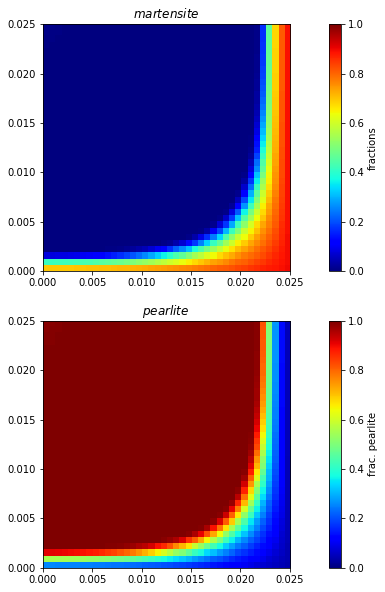

In [19]:
fig1, (axp2, axc2)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

viewer1 = MultiViewer(viewers = (Matplotlib2DGridViewer(vars=fi, title='$martensite$', axes=axp2, \
                                                       datamin=0., datamax=1.), \
                                Matplotlib2DGridViewer(vars=fp,  title='$pearlite$'   , axes=axc2, \
                                                       datamin=0., datamax=1.)))


In [20]:
plt.plot(tempload.reshape(N,N)[:,20])

NameError: name 'tempload' is not defined

In [ ]:
%matplotlib inline
temperatureViewer.plot(path + "temperature100.png")

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

In [ ]:
t=[]
t1=[]
for i in range(1,540,5):
    load = np.loadtxt(path+"temperatureOH"+str(i))
    t.append(load.reshape(N,N)[5,1])
    t1.append(load.reshape(N,N)[20,20])
fig, ax = plt.subplots()
ax.plot(t)
ax.plot(t1)
ax.set(title='Temperature',ylabel='Temperature K',xlabel='timesteps')

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

In [ ]:
plta = plt.plot(Tvstime)

### Martensite and pearlite amounts

In [ ]:
fig2, (axp22, axc22)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

axp22.plot(fi.value.reshape(N,N)[2,:], 'r')
axp22.plot(fp.value.reshape(N,N)[2,:], 'b')
axp22.set_xlabel('Radius')
axp22.set_ylabel('Amount of phase %')
axp22.set_title('Amount of pearlite (blue) and martensite (red) phases')

axc22.plot(fi.value.reshape(N,N)[:,20], 'r')
axc22.plot(fp.value.reshape(N,N)[:,20], 'b')
axc22.set_xlabel('Height')
axc22.set_ylabel('Amount of phase %')
axc22.set_title('Amount of pearlite (blue) and martensite (red) phases')